In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet
from keras.datasets import mnist
from common.functions import softmax

Using TensorFlow backend.


In [2]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = mnist.load_data()

# 1次元へ整形
x_train, x_test = x_train.reshape(-1, 784), x_test.reshape(-1, 784)

# 正規化
x_train, x_test = x_train.astype(np.float32) / 255.0, x_test.astype(np.float32) / 255.0

In [3]:
x_base = x_train[0].copy()
x_base

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

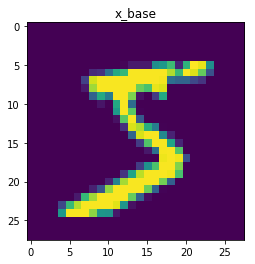

In [4]:
plt.imshow(x_base.reshape(28,28))
plt.title("x_base")
plt.show()

In [5]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# パラメータのロード
network.load_params("params_nn.pkl")
print("loaded Network Parameters!")

loaded Network Parameters!


In [6]:
pred = network.predict(x_base)
pred

array([-0.85297713, -3.66424245, -0.18508496,  9.85418412, -8.86099437,
       13.11292996, -6.54674727, -0.99105145, -2.4386287 ,  0.65709932])

In [7]:
pred_label = np.argmax(pred)
pred_label

5

In [8]:
pred_score = max(softmax(pred))
pred_score

0.9629792385831452

In [9]:
x = x_base.copy().reshape(1, 784)
grads = network.gradient(x, np.array([5]))
grads

{'W1': array([[ 0.,  0., -0., ...,  0.,  0., -0.],
        [ 0.,  0., -0., ...,  0.,  0., -0.],
        [ 0.,  0., -0., ...,  0.,  0., -0.],
        ...,
        [ 0.,  0., -0., ...,  0.,  0., -0.],
        [ 0.,  0., -0., ...,  0.,  0., -0.],
        [ 0.,  0., -0., ...,  0.,  0., -0.]]),
 'b1': array([ 0.59501187,  0.        , -0.08626725,  0.        ,  1.61602834,
        -0.2287034 ,  0.28330339,  0.2175782 , -0.14538351,  0.        ,
         0.        , -0.38700391, -0.17614508,  0.93815647, -0.32504232,
         0.        ,  0.11624453, -0.1421366 ,  0.        ,  0.09995574,
        -0.16060556, -0.23132116,  0.        ,  0.35436002, -0.52916375,
         0.        ,  0.23841823, -0.37942013,  0.        ,  0.        ,
         0.41232297, -0.90519429, -0.04907277,  0.        ,  0.        ,
        -0.29596362,  0.42391619,  0.        ,  0.19562347, -0.01368109,
         0.02194432,  1.15586554,  0.        ,  0.05876006, -0.38063817,
        -0.53019185,  0.45476403,  0.        ,

In [10]:
np.set_printoptions(threshold=np.inf)
print(grads['W1'])

[[ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.0000

In [11]:
print(grads['W1'].shape)

(784, 50)


In [12]:
grads_w1_sum = np.sum(grads['W1'], axis=0)
grads_w1_sum

array([ 64.22628159,   0.        ,  -9.31178871,   0.        ,
       174.43600149, -24.68651402,  30.58010165,  23.48564742,
       -15.69286712,   0.        ,   0.        , -41.77365768,
       -19.01330706, 101.26571447, -35.0854505 ,   0.        ,
        12.54757106, -15.34239226,   0.        ,  10.78934067,
       -17.3359537 , -24.96907819,   0.        ,  38.25003749,
       -57.11855877,   0.        ,  25.73514422, -40.95505528,
         0.        ,   0.        ,  44.50662734, -97.70773783,
        -5.29697269,   0.        ,   0.        , -31.94666196,
        45.75801312,   0.        ,  21.11582766,  -1.47675298,
         2.36869565, 124.76548778,   0.        ,   6.34263027,
       -41.08653255, -57.22953309,  49.08776448,   0.        ,
         1.94712718, -52.60380931])

In [13]:
false_list = [[], [], [], [], [], [], [], [], [], []]
false_list

[[], [], [], [], [], [], [], [], [], []]

In [14]:
true_list = [[], [], [], [], [], [], [], [], [], []]
true_list

[[], [], [], [], [], [], [], [], [], []]

In [15]:
for i, t in enumerate(x_test):
    pre_l = np.argmax(network.predict(t))
    true_l = t_test[i]
    if pre_l == true_l:
        true_list[true_l].append(i)
    else:
        false_list[true_l].append(i)

In [16]:
len(true_list[5])

842

In [17]:
len(false_list[5])

50

In [18]:
def all_g(nums, label):
    li = np.zeros(50)
    for i in nums:
        g = network.gradient(x_test[i].reshape(1, 784), np.array([label]))
        li += np.sum(g['W1'], axis=0)
        
    return li
    

In [19]:
def compare_g(t_nums, f_nums, label):
    t = all_g(t_nums, label)
    f = all_g(f_nums, label)
    
    w = 0.4
    plt.figure(figsize=(30, 10))
    plt.bar(np.arange(50), t, color='b', label='True', width=w, align="center")
    plt.bar(np.arange(50)+w, f, color='g', label='False', width=w, align="center")
    plt.legend(loc=2)
    plt.show()
    
    print("True TOP10")
    
    for i in range(10):
        print(np.argsort(abs(t))[::-1][i], np.sort(abs(t))[::-1][i])
        
    print("===============")
    
    print("False TOP10")
    
    for i in range(10):
        print(np.argsort(abs(f))[::-1][i], np.sort(abs(f))[::-1][i])
        
        
    
    return t - f

In [20]:
def all_c(nums, label):
    li = np.zeros(50)
    for i in nums:
        g = network.gradient(x_test[i].reshape(1, 784), np.array([label]))
        li += (np.sum(g['W1'], axis=0) != 0)
        
    return li
    

In [31]:
def compare_c(t_nums, f_nums, label):
    t = all_c(t_nums, label)
    f = all_c(f_nums, label)
    
    w = 0.4
    plt.figure(figsize=(30, 10))
    plt.bar(np.arange(50), t, color='b', label='True', width=w, align="center")
    plt.bar(np.arange(50)+w, f, color='g', label='False', width=w, align="center")
    plt.legend(loc=2)
    plt.show()
    
    print("True TOP10")
    
    for i in range(10):
        print(np.argsort(t)[::-1][i], np.sort(t)[::-1][i])
        
                
    print("===============")
    
    print("False TOP10")
    
    for i in range(10):
        print(np.argsort(f)[::-1][i], np.sort(f)[::-1][i])
    
    diff_tf = t- f
    
    plt.cla()
    plt.bar(np.arange(50), (diff_tf))
    plt.show()
    
    print("True - False TOP10")
    
    for i in range(10):
        print(np.argsort(abs(diff_tf))[::-1][i], np.sort(abs(diff_tf)[::-1][i])
    
    return t - f

0


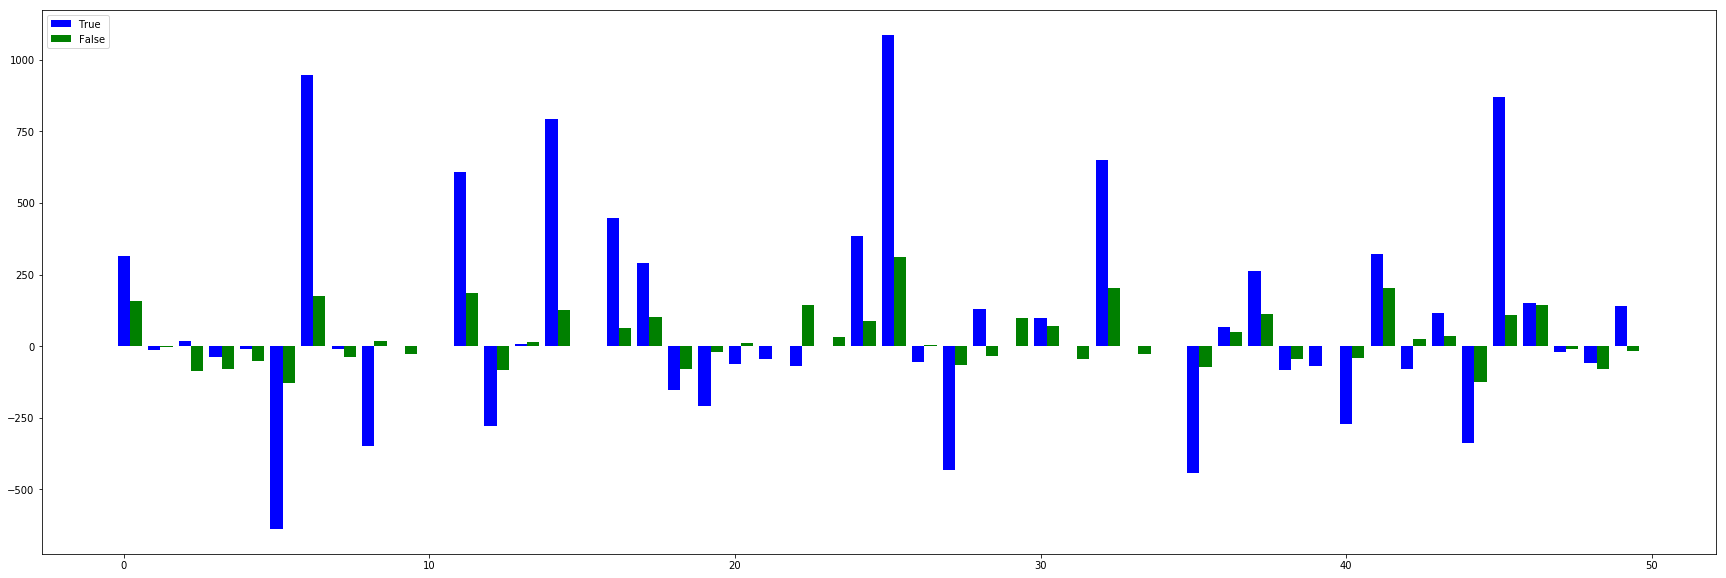

True TOP10
25 1087.175128213439
6 947.1624894503067
45 870.8644684399727
14 793.5181578471459
32 650.6846214012485
5 639.1712045882598
11 607.4907195856892
16 447.7645674365615
35 443.62262123382715
27 431.14277944813495
False TOP10
25 311.0590993973526
41 202.48481040890616
32 201.45457678790524
11 184.02404351987866
6 174.15564277665953
0 159.34145864041685
22 144.47011794711577
46 143.60170068023223
5 128.7837703356505
44 126.96146792235842


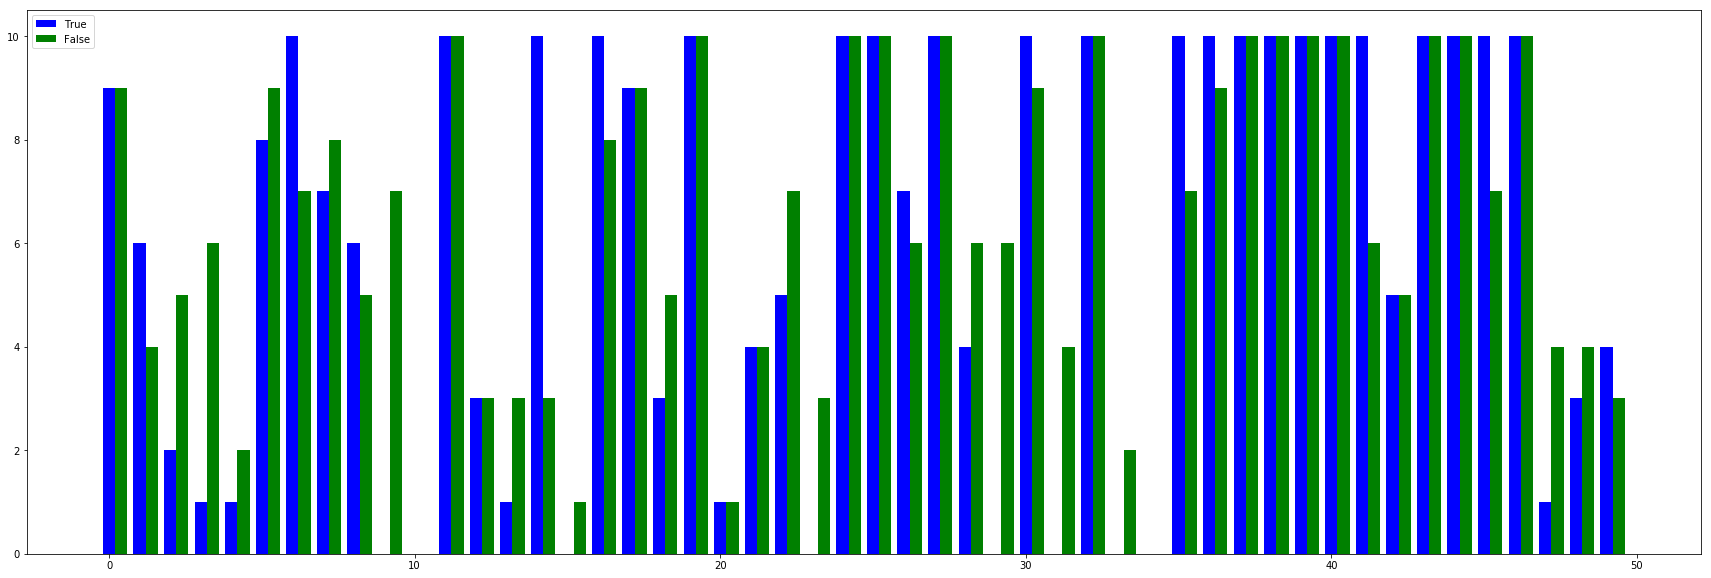

True TOP10
24 10.0
27 10.0
19 10.0
30 10.0
32 10.0
16 10.0
14 10.0
35 10.0
36 10.0
37 10.0
False TOP10
24 10.0
32 10.0
46 10.0
11 10.0
44 10.0
43 10.0
19 10.0
40 10.0
39 10.0
38 10.0
37 10.0
25 10.0
27 10.0
5 9.0
17 9.0
30 9.0
0 9.0
36 9.0
16 8.0
7 8.0
6 7.0
9 7.0
22 7.0
45 7.0
35 7.0
26 6.0
28 6.0
3 6.0
41 6.0
29 6.0
2 5.0
18 5.0
42 5.0
8 5.0
48 4.0
31 4.0
47 4.0
1 4.0
21 4.0
49 3.0
12 3.0
13 3.0
14 3.0
23 3.0
4 2.0
33 2.0
15 1.0
20 1.0
10 0.0
34 0.0


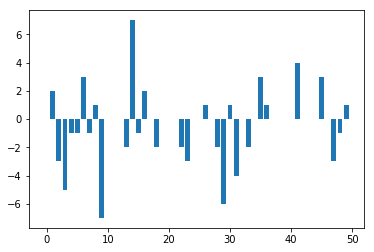

True - False TOP10
14 7.0
9 7.0
29 6.0
3 5.0
31 4.0
41 4.0
47 3.0
45 3.0
2 3.0
6 3.0
#############################
1


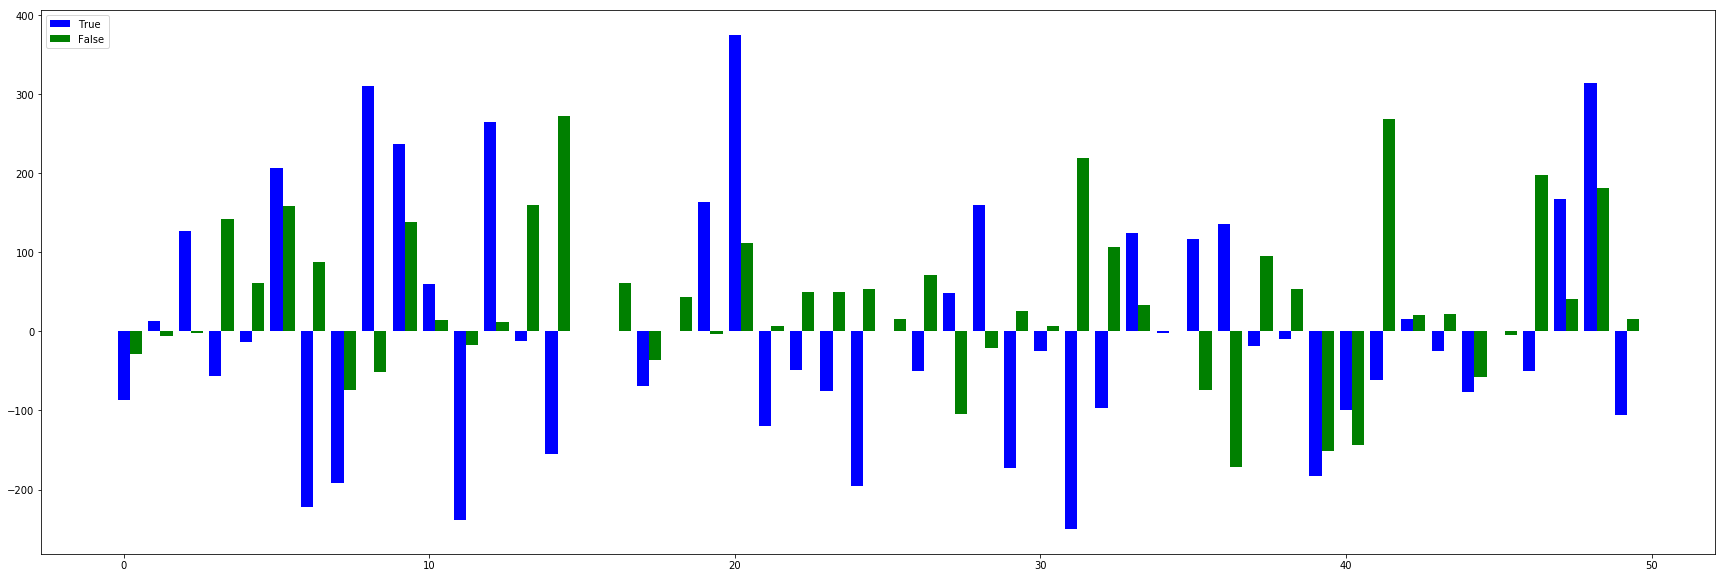

True TOP10
20 374.922749061492
48 314.2477714406107
8 310.11195825785893
12 264.8616795009361
31 249.99205364677363
11 238.03738109473173
9 237.6010987078264
6 221.73803406978593
5 206.61052610133703
24 194.98647027778608
False TOP10
14 271.8941790588931
41 268.03251196907996
31 219.66390048879921
46 198.25757980892394
48 181.1252409559207
36 171.30324506219276
13 159.78154505631156
5 159.18246704583473
39 150.7606555631511
40 143.51192962106384


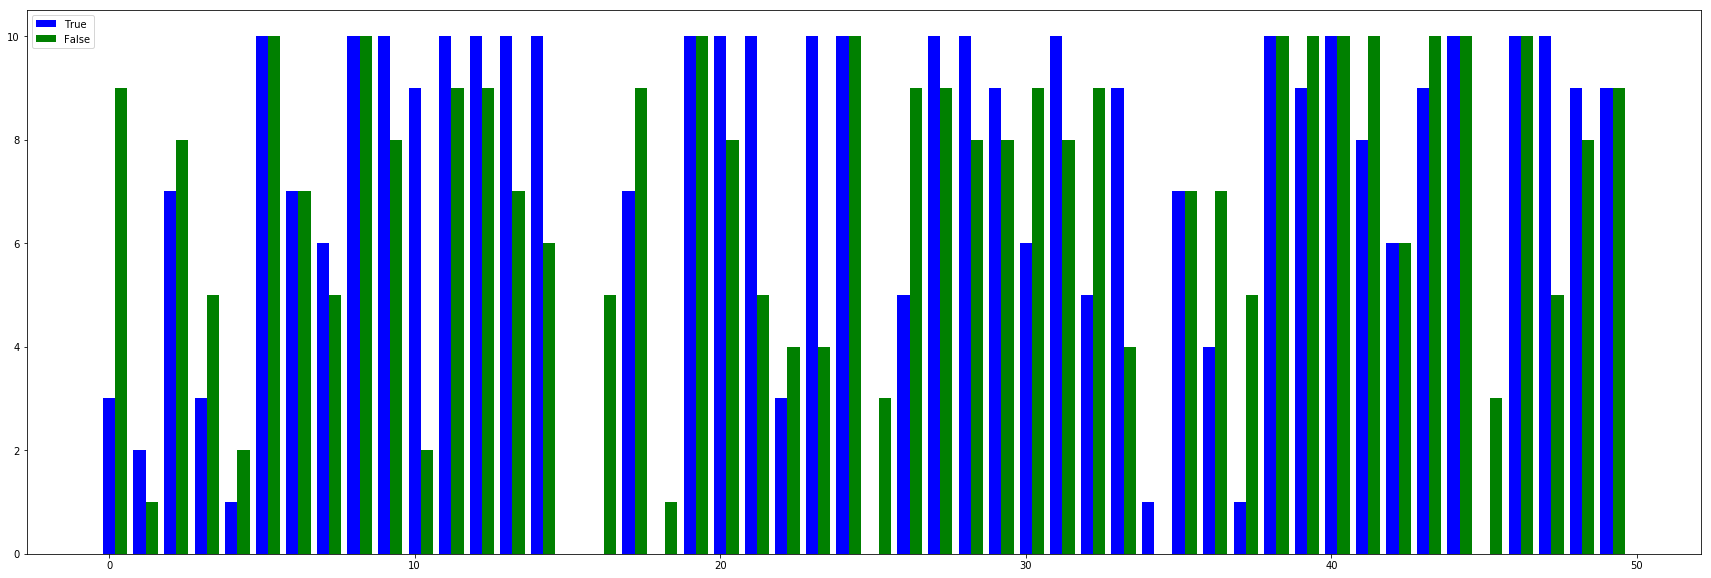

True TOP10
24 10.0
27 10.0
23 10.0
31 10.0
21 10.0
20 10.0
19 10.0
14 10.0
13 10.0
12 10.0
False TOP10
24 10.0
43 10.0
19 10.0
38 10.0
39 10.0
40 10.0
41 10.0
44 10.0
8 10.0
46 10.0
5 10.0
11 9.0
30 9.0
12 9.0
17 9.0
26 9.0
27 9.0
49 9.0
0 9.0
32 9.0
48 8.0
2 8.0
9 8.0
20 8.0
31 8.0
28 8.0
29 8.0
6 7.0
35 7.0
36 7.0
13 7.0
14 6.0
42 6.0
47 5.0
37 5.0
7 5.0
3 5.0
21 5.0
16 5.0
33 4.0
23 4.0
22 4.0
25 3.0
45 3.0
10 2.0
4 2.0
18 1.0
1 1.0
34 0.0
15 0.0


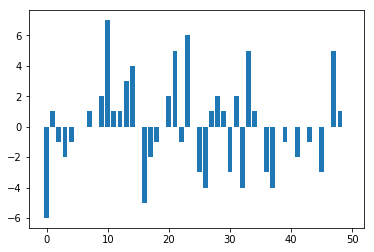

True - False TOP10
10 7.0
23 6.0
0 6.0
47 5.0
16 5.0
21 5.0
33 5.0
26 4.0
14 4.0
37 4.0
#############################
2


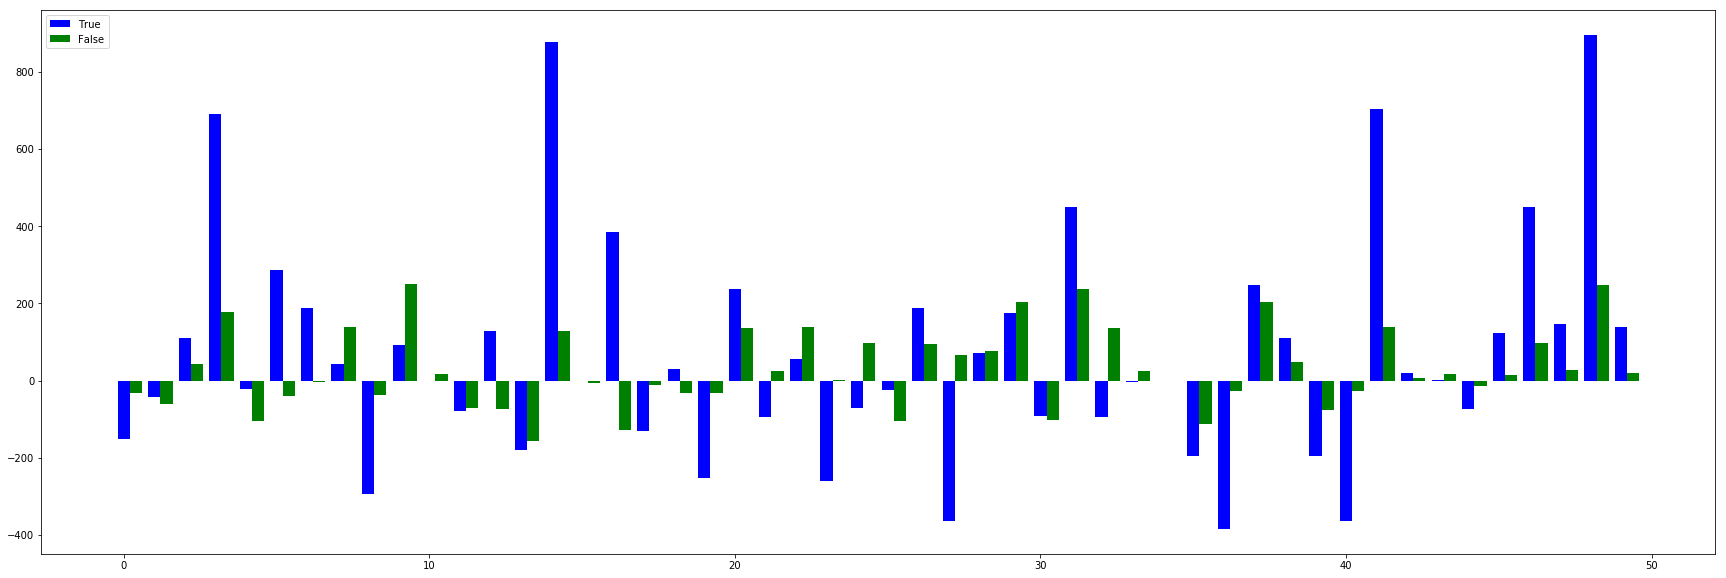

True TOP10
48 895.5860150655232
14 877.5293412796494
41 703.1622130804149
3 690.3109559331409
31 449.66184881840195
46 448.82845355318557
16 385.82271070208026
36 384.98657188374125
40 364.1787212825148
27 363.50231185670214
False TOP10
9 250.98458374360007
48 248.09529360809293
31 236.81310621532646
29 204.43059225027372
37 204.15657783768904
3 176.92490691078564
13 157.85811052809794
7 139.9633620237537
41 138.6489693755159
22 138.18789850340605


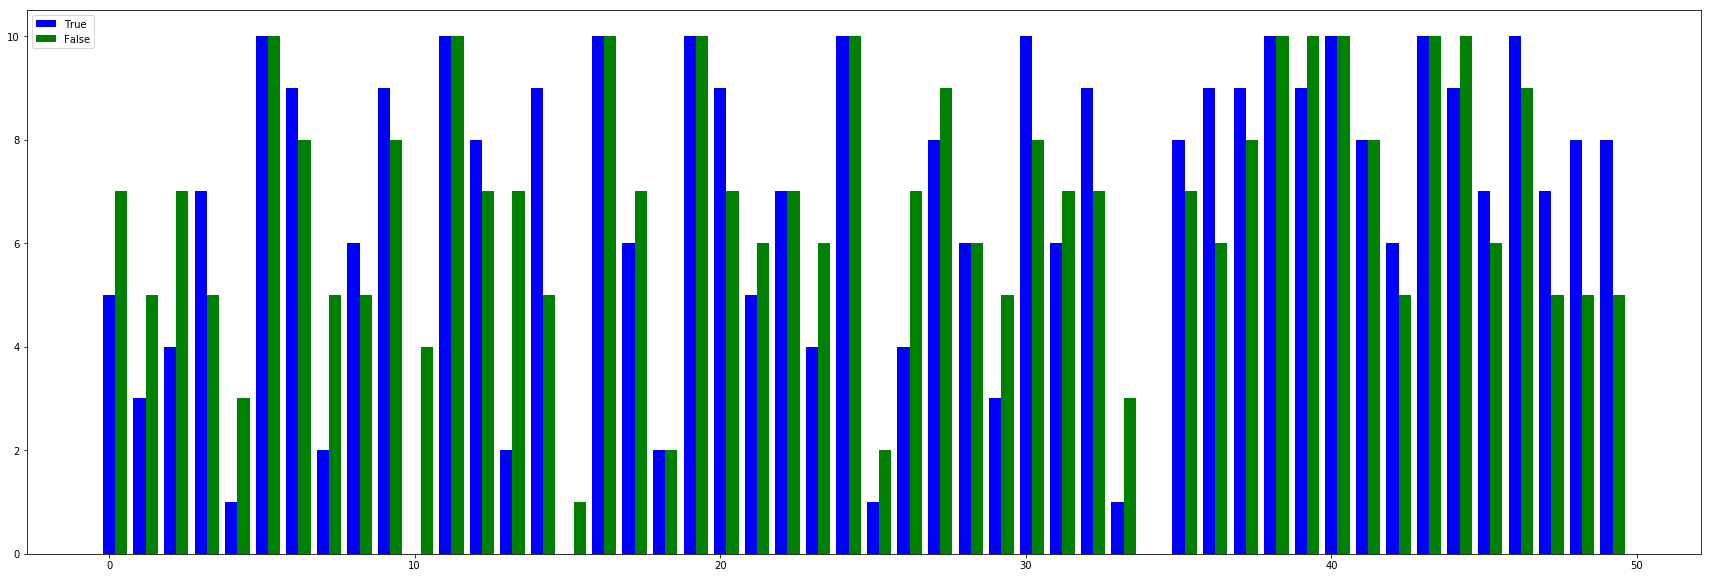

True TOP10
24 10.0
11 10.0
30 10.0
19 10.0
16 10.0
40 10.0
38 10.0
43 10.0
46 10.0
5 10.0
False TOP10
24 10.0
40 10.0
19 10.0
16 10.0
11 10.0
39 10.0
38 10.0
43 10.0
44 10.0
5 10.0
46 9.0
27 9.0
6 8.0
41 8.0
37 8.0
9 8.0
30 8.0
22 7.0
12 7.0
13 7.0
17 7.0
2 7.0
20 7.0
0 7.0
35 7.0
26 7.0
31 7.0
32 7.0
23 6.0
21 6.0
28 6.0
45 6.0
36 6.0
49 5.0
42 5.0
7 5.0
8 5.0
14 5.0
48 5.0
3 5.0
47 5.0
1 5.0
29 5.0
10 4.0
33 3.0
4 3.0
25 2.0
18 2.0
15 1.0
34 0.0


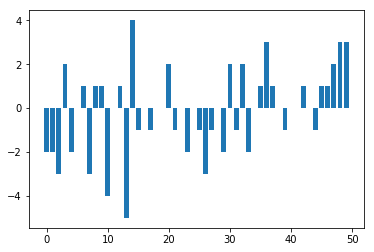

True - False TOP10
13 5.0
10 4.0
14 4.0
26 3.0
36 3.0
48 3.0
49 3.0
7 3.0
2 3.0
32 2.0
#############################
3


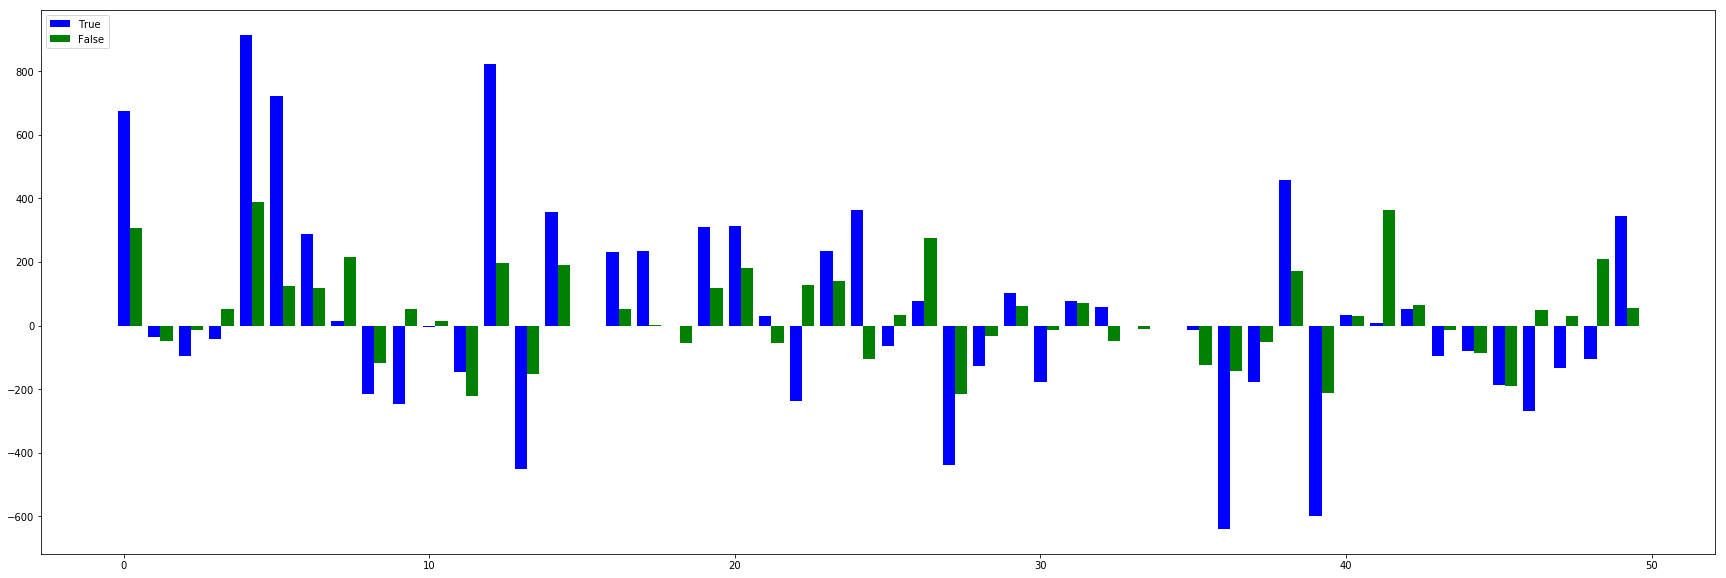

True TOP10
4 914.584488684887
12 821.5703006724475
5 721.5725443574582
0 674.0212127432796
36 640.7186459897188
39 598.5503893521814
38 459.26051262646627
13 451.0946893491692
27 438.1635927961682
24 362.36322952864174
False TOP10
4 388.35270541994106
41 362.8782175837983
0 306.52964292775926
26 275.62020389725257
11 220.33516996076423
7 216.40841046874988
27 214.65350441242694
39 213.0362251479009
48 208.8971616775218
12 196.92061584442843


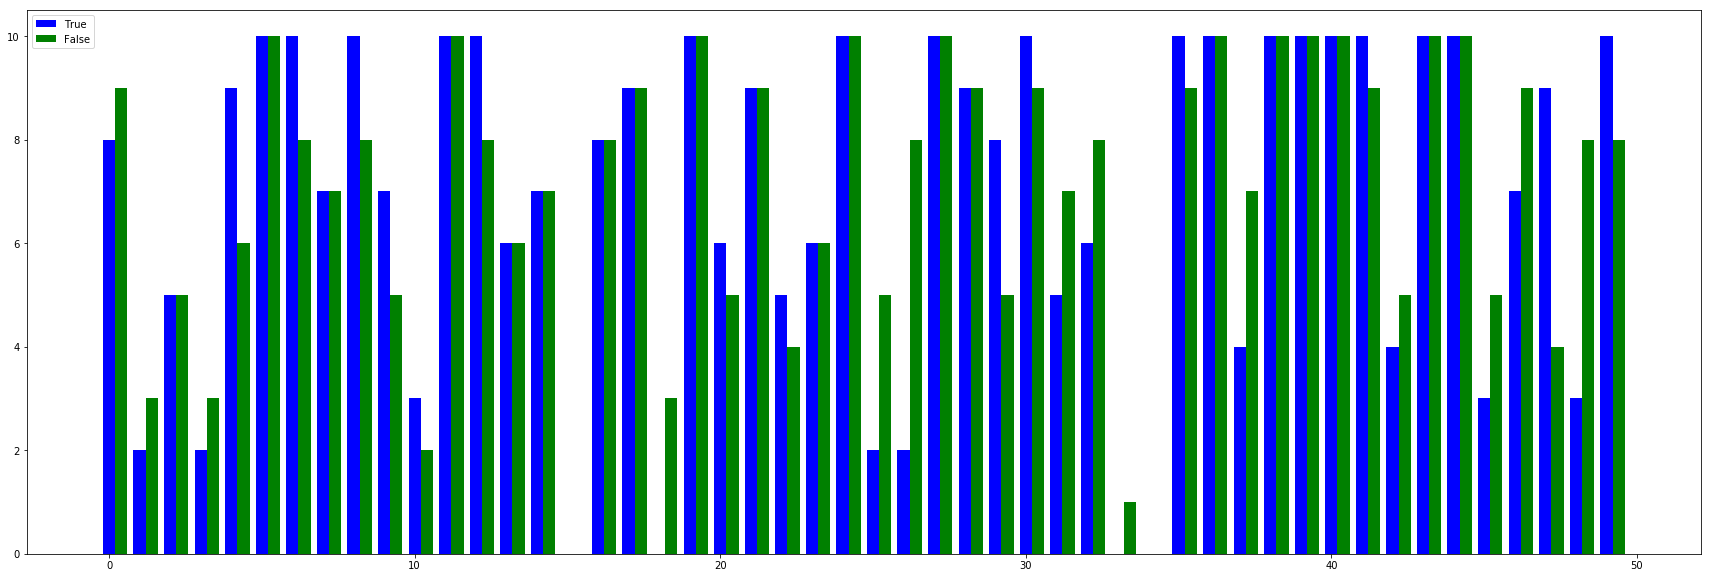

True TOP10
49 10.0
36 10.0
5 10.0
6 10.0
8 10.0
11 10.0
12 10.0
19 10.0
27 10.0
30 10.0
False TOP10
24 10.0
5 10.0
11 10.0
44 10.0
43 10.0
19 10.0
40 10.0
39 10.0
38 10.0
27 10.0
36 10.0
30 9.0
17 9.0
21 9.0
28 9.0
0 9.0
46 9.0
35 9.0
41 9.0
16 8.0
48 8.0
6 8.0
8 8.0
12 8.0
32 8.0
49 8.0
26 8.0
31 7.0
7 7.0
37 7.0
14 7.0
23 6.0
13 6.0
4 6.0
2 5.0
9 5.0
29 5.0
45 5.0
42 5.0
20 5.0
25 5.0
22 4.0
47 4.0
18 3.0
3 3.0
1 3.0
10 2.0
33 1.0
15 0.0
34 0.0


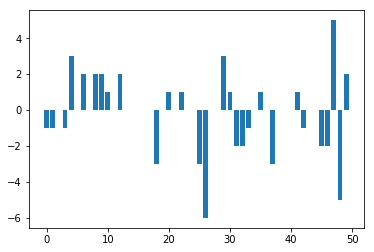

True - False TOP10
26 6.0
47 5.0
48 5.0
25 3.0
29 3.0
4 3.0
18 3.0
37 3.0
31 2.0
32 2.0
#############################
4


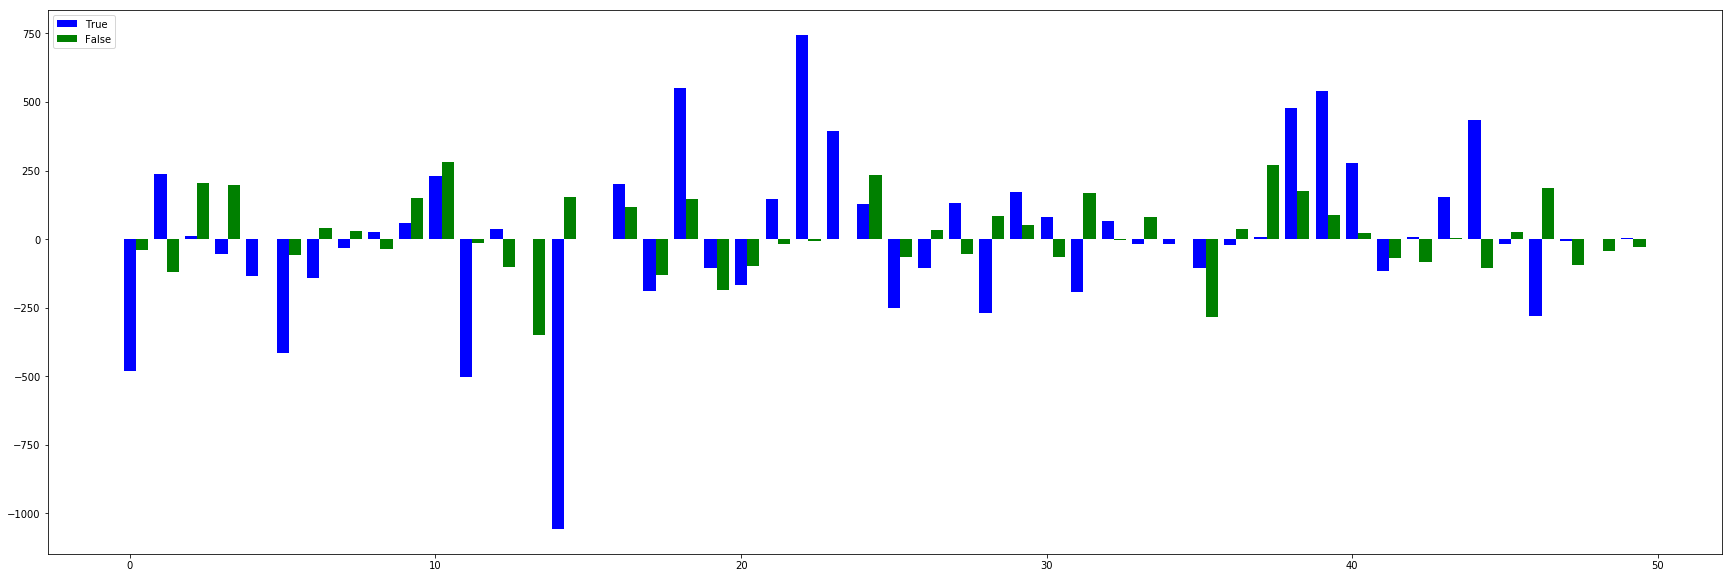

True TOP10
14 1057.8565404593912
22 744.6307667428156
18 551.6003630726702
39 540.1663836129846
11 502.41764616223304
0 481.54528730448084
38 477.37222834191255
44 434.84961522906394
5 417.3192774122235
23 394.73923153321323
False TOP10
13 349.35050748366626
35 284.00226188182313
10 280.0593621838592
37 271.3100995908858
24 234.07184041452214
2 205.04119633135332
3 198.97641211089592
19 187.40025140767398
46 184.48106808967265
38 176.25030100747733


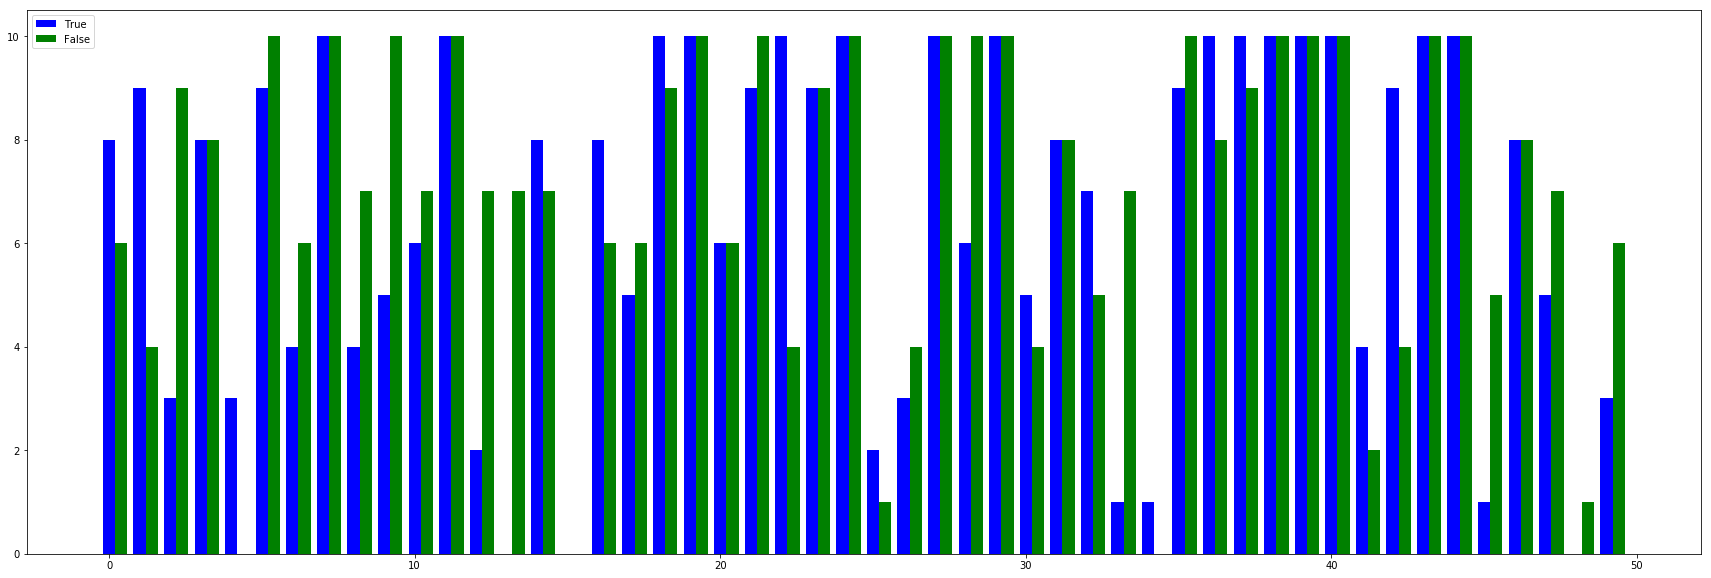

True TOP10
24 10.0
39 10.0
27 10.0
29 10.0
19 10.0
18 10.0
11 10.0
36 10.0
38 10.0
37 10.0
False TOP10
24 10.0
38 10.0
9 10.0
27 10.0
28 10.0
29 10.0
21 10.0
7 10.0
19 10.0
35 10.0
11 10.0
39 10.0
40 10.0
5 10.0
43 10.0
44 10.0
37 9.0
23 9.0
2 9.0
18 9.0
3 8.0
31 8.0
46 8.0
36 8.0
13 7.0
12 7.0
33 7.0
10 7.0
8 7.0
47 7.0
14 7.0
16 6.0
6 6.0
49 6.0
17 6.0
20 6.0
0 6.0
32 5.0
45 5.0
22 4.0
26 4.0
30 4.0
42 4.0
1 4.0
41 2.0
48 1.0
25 1.0
15 0.0
34 0.0
4 0.0


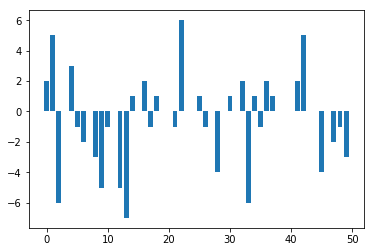

True - False TOP10
13 7.0
33 6.0
2 6.0
22 6.0
1 5.0
42 5.0
9 5.0
12 5.0
45 4.0
28 4.0
#############################
5


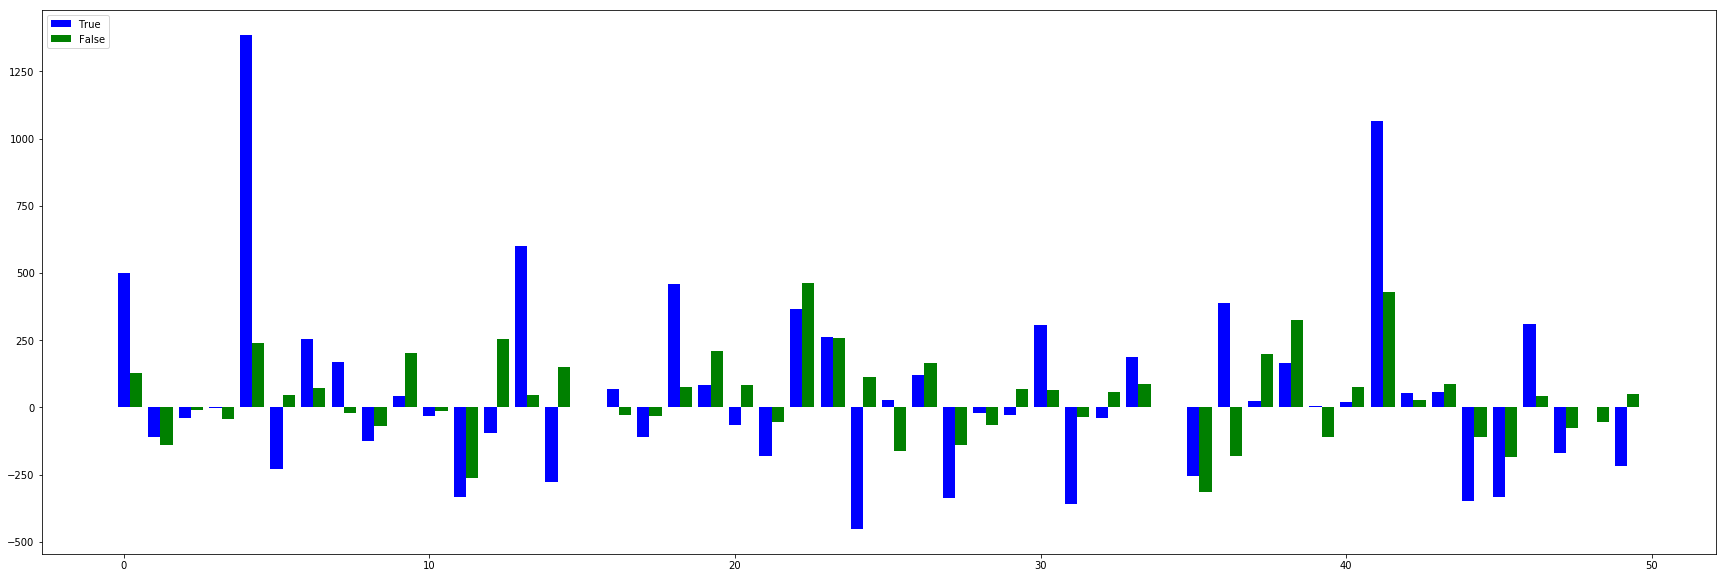

True TOP10
4 1385.5792676318924
41 1064.2179558517696
13 600.5269980809137
0 499.06002568973446
18 458.1753283052174
24 453.10245021706163
36 387.23142642436187
22 366.0505361468596
31 360.7949027994865
44 348.0645921096286
False TOP10
22 464.35852946946306
41 427.6111246657575
38 324.5864772692076
35 314.607146432221
11 262.83628801772556
23 259.2066955607479
12 254.96030186921777
4 237.82863832191754
19 209.81037340525418
9 202.43075311057808


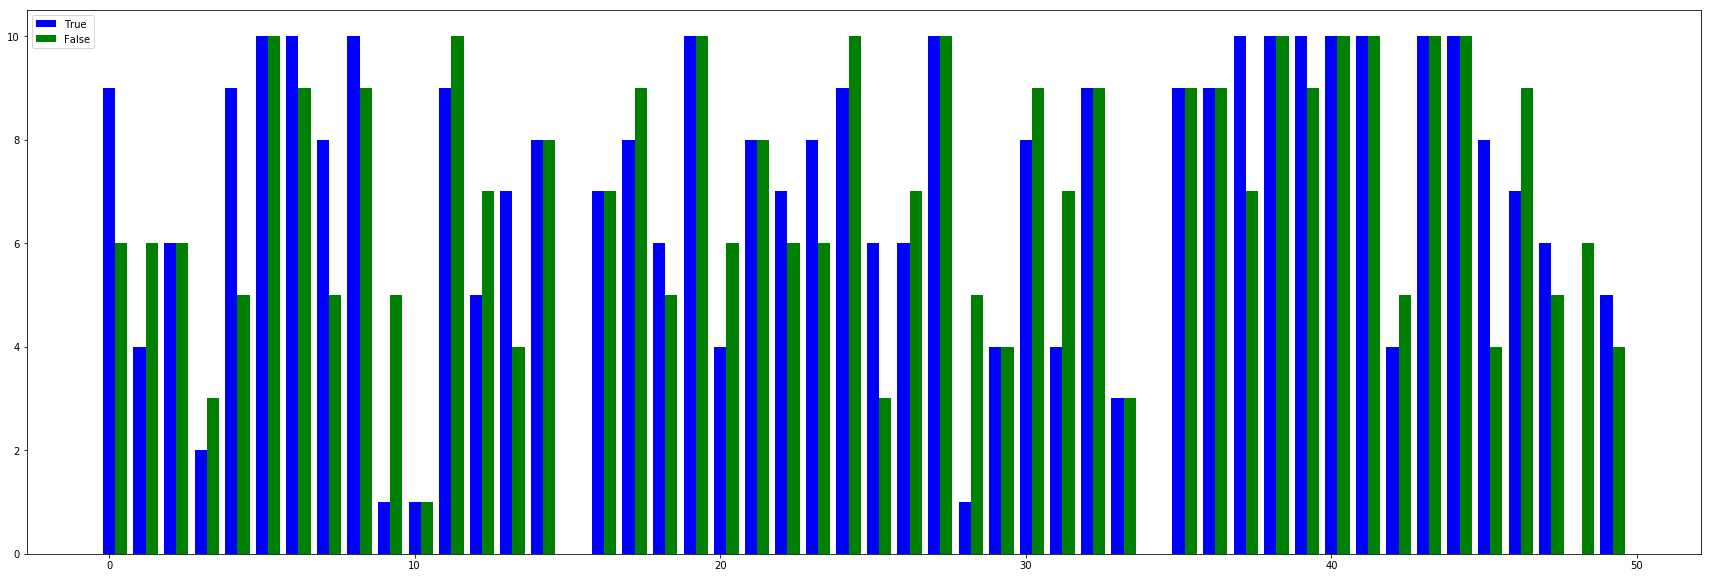

True TOP10
5 10.0
6 10.0
44 10.0
43 10.0
8 10.0
41 10.0
40 10.0
39 10.0
38 10.0
37 10.0
False TOP10
24 10.0
19 10.0
27 10.0
44 10.0
43 10.0
5 10.0
41 10.0
40 10.0
11 10.0
38 10.0
6 9.0
17 9.0
30 9.0
32 9.0
8 9.0
35 9.0
36 9.0
39 9.0
46 9.0
14 8.0
21 8.0
31 7.0
37 7.0
12 7.0
26 7.0
16 7.0
20 6.0
2 6.0
1 6.0
0 6.0
22 6.0
23 6.0
48 6.0
18 5.0
47 5.0
4 5.0
42 5.0
7 5.0
9 5.0
28 5.0
29 4.0
13 4.0
45 4.0
49 4.0
33 3.0
25 3.0
3 3.0
10 1.0
34 0.0
15 0.0


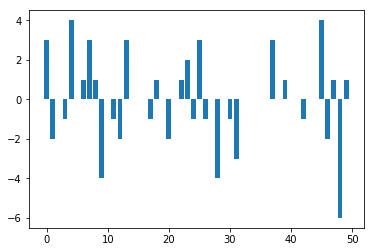

True - False TOP10
48 6.0
9 4.0
28 4.0
45 4.0
4 4.0
31 3.0
13 3.0
37 3.0
25 3.0
0 3.0
#############################
6


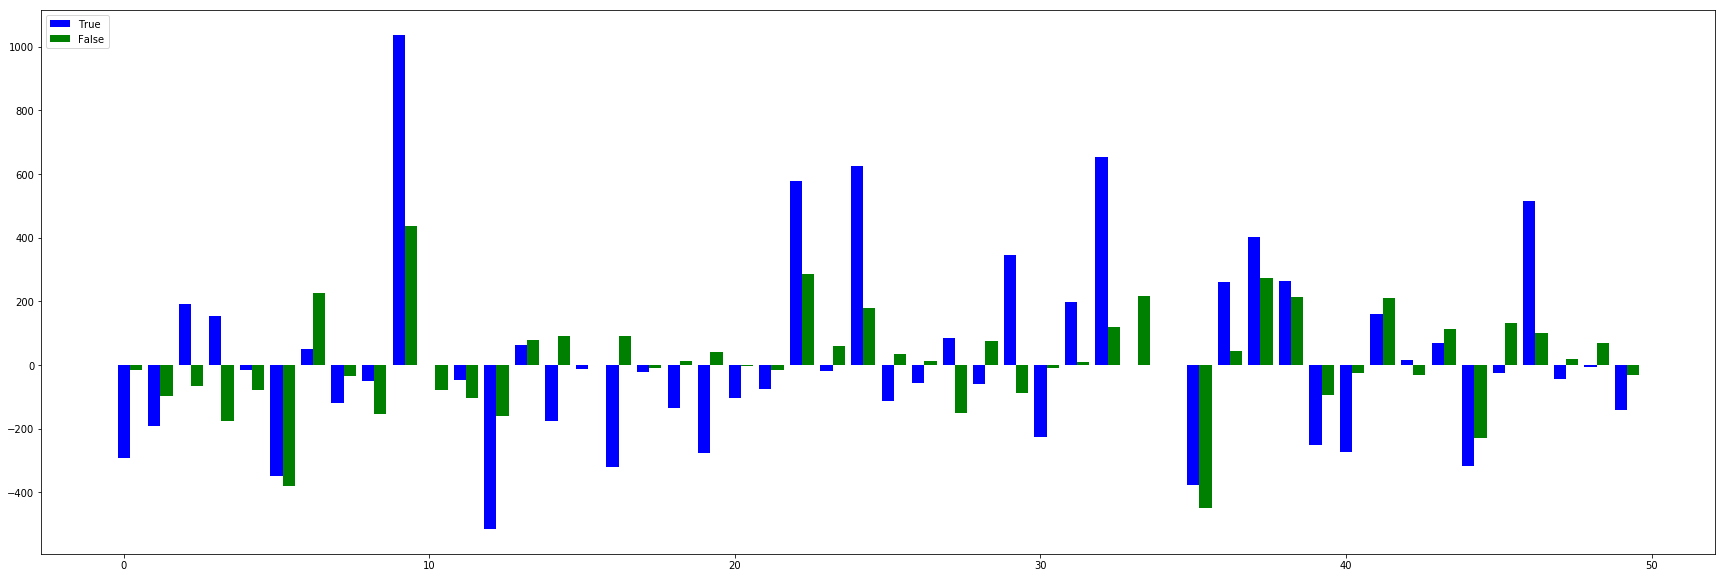

True TOP10
9 1037.281374268094
32 653.89342834687
24 624.0984621936143
22 579.6037242877636
46 515.6072149927782
12 515.2654363898718
37 401.5753764047045
35 375.6182814182757
5 347.53573437694274
29 347.34331364308287
False TOP10
35 449.6336457334661
9 435.77347055320433
5 378.78530105286194
22 286.36664639850665
37 273.39749734155913
44 228.5511951311259
6 226.46264117931213
33 217.96472487483555
38 215.38754239678536
41 210.05756609650558


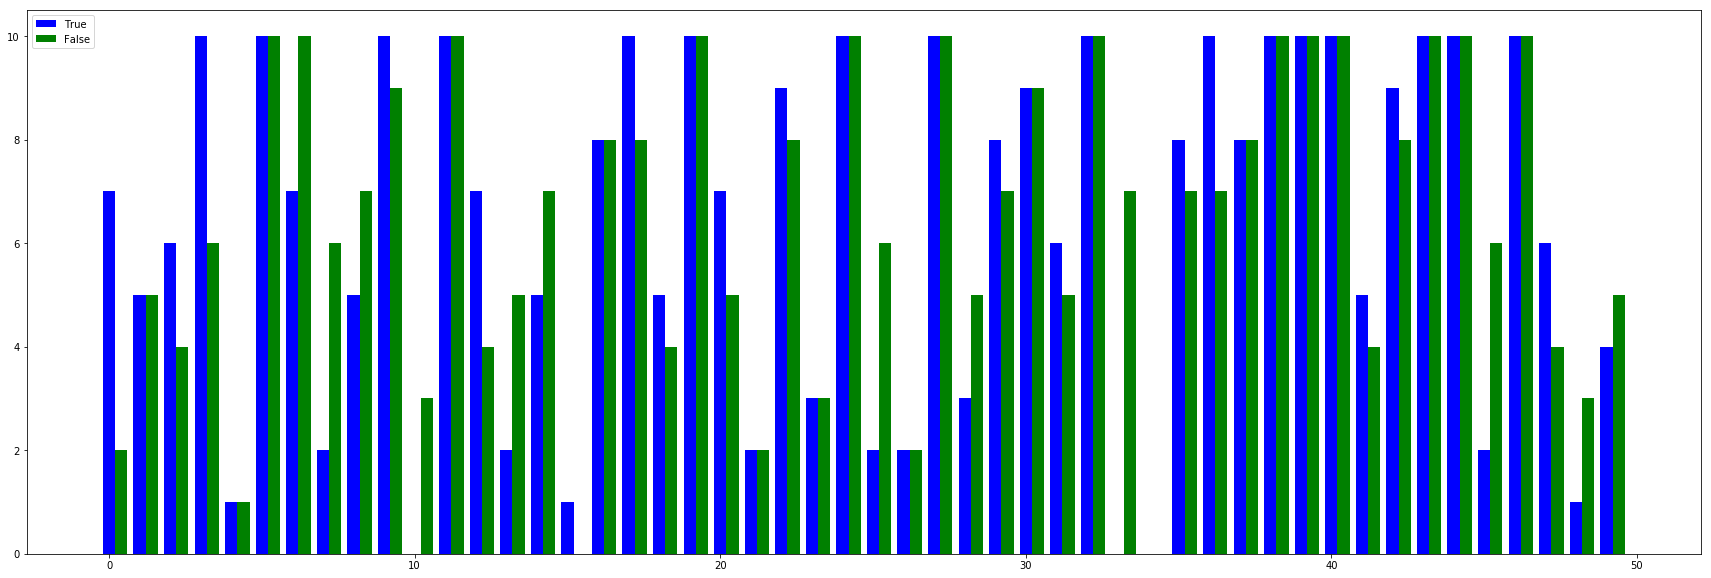

True TOP10
24 10.0
39 10.0
19 10.0
17 10.0
27 10.0
32 10.0
11 10.0
9 10.0
38 10.0
36 10.0
False TOP10
24 10.0
32 10.0
19 10.0
46 10.0
44 10.0
43 10.0
11 10.0
40 10.0
39 10.0
38 10.0
27 10.0
6 10.0
5 10.0
9 9.0
30 9.0
22 8.0
16 8.0
17 8.0
37 8.0
42 8.0
35 7.0
36 7.0
29 7.0
8 7.0
14 7.0
33 7.0
7 6.0
25 6.0
3 6.0
45 6.0
13 5.0
1 5.0
49 5.0
20 5.0
28 5.0
31 5.0
18 4.0
41 4.0
47 4.0
12 4.0
2 4.0
23 3.0
10 3.0
48 3.0
26 2.0
21 2.0
0 2.0
4 1.0
34 0.0
15 0.0


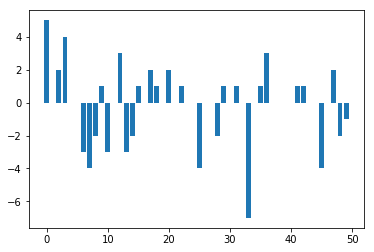

True - False TOP10
33 7.0
0 5.0
45 4.0
3 4.0
7 4.0
25 4.0
10 3.0
36 3.0
13 3.0
12 3.0
#############################
7


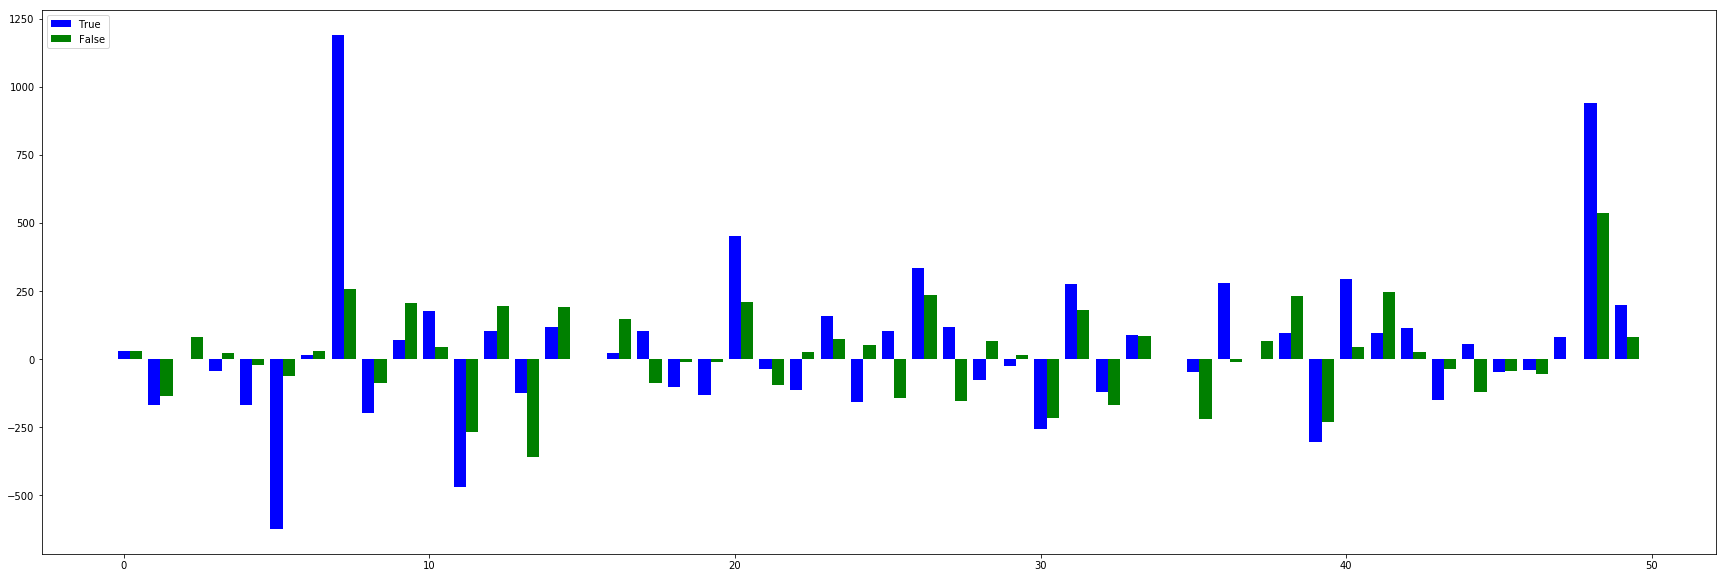

True TOP10
7 1191.1076747961283
48 939.1660545070572
5 624.7453256171489
11 470.547692830362
20 452.86668889381605
26 333.051260761866
39 306.10858970998896
40 294.0446851766321
36 280.5993860566466
31 277.4076145093127
False TOP10
48 538.4847917645751
13 360.8572740662138
11 267.7395283297289
7 255.73144585020634
41 246.62154708793867
26 235.63863192231642
39 233.03832012093562
38 232.47611298966464
35 218.58223153397242
30 216.73693325041637


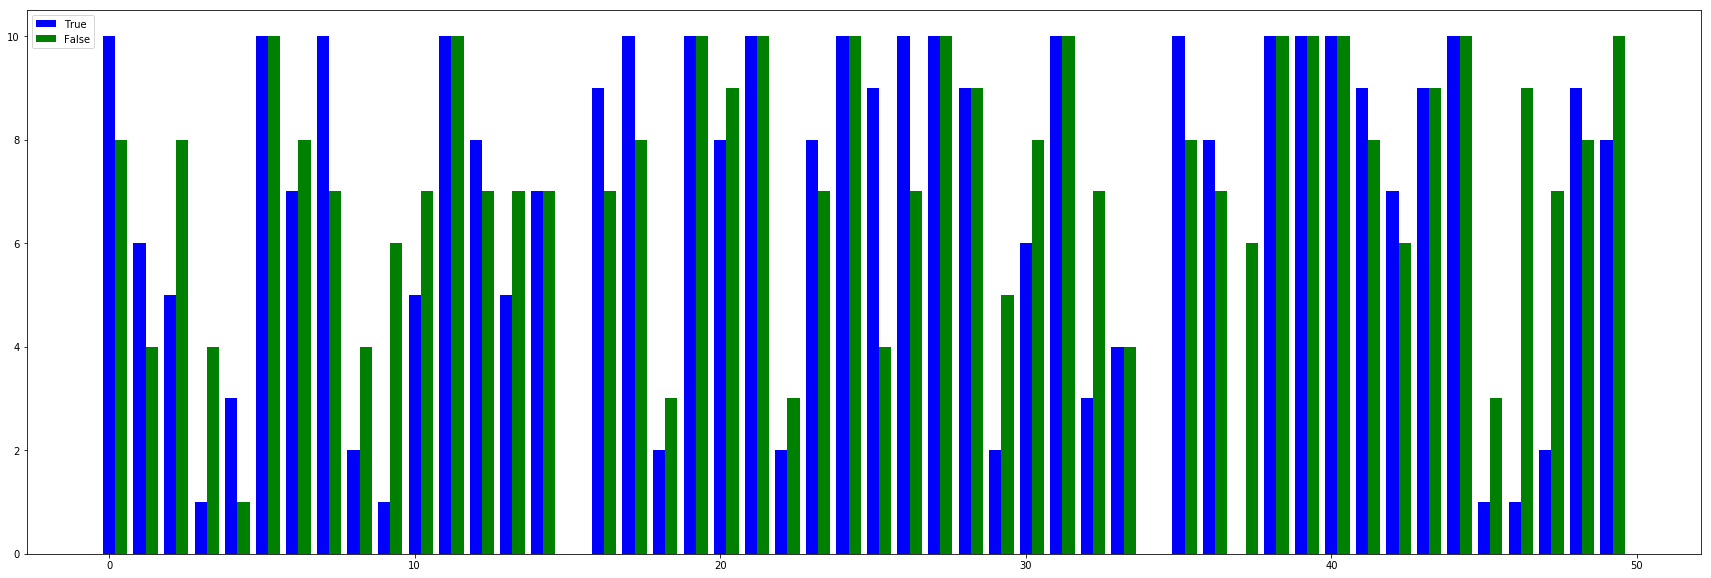

True TOP10
24 10.0
35 10.0
5 10.0
7 10.0
11 10.0
17 10.0
19 10.0
21 10.0
26 10.0
27 10.0
False TOP10
49 10.0
39 10.0
5 10.0
11 10.0
19 10.0
21 10.0
27 10.0
31 10.0
38 10.0
24 10.0
40 10.0
44 10.0
28 9.0
46 9.0
20 9.0
43 9.0
2 8.0
6 8.0
17 8.0
41 8.0
48 8.0
0 8.0
35 8.0
30 8.0
13 7.0
23 7.0
47 7.0
32 7.0
36 7.0
7 7.0
16 7.0
10 7.0
14 7.0
26 7.0
12 7.0
37 6.0
42 6.0
9 6.0
29 5.0
8 4.0
33 4.0
3 4.0
25 4.0
1 4.0
18 3.0
22 3.0
45 3.0
4 1.0
15 0.0
34 0.0


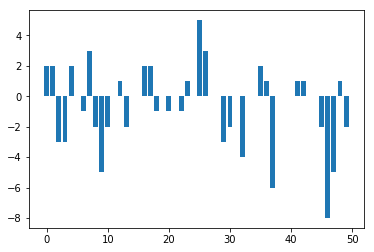

True - False TOP10
46 8.0
37 6.0
47 5.0
25 5.0
9 5.0
32 4.0
26 3.0
2 3.0
3 3.0
7 3.0
#############################
8


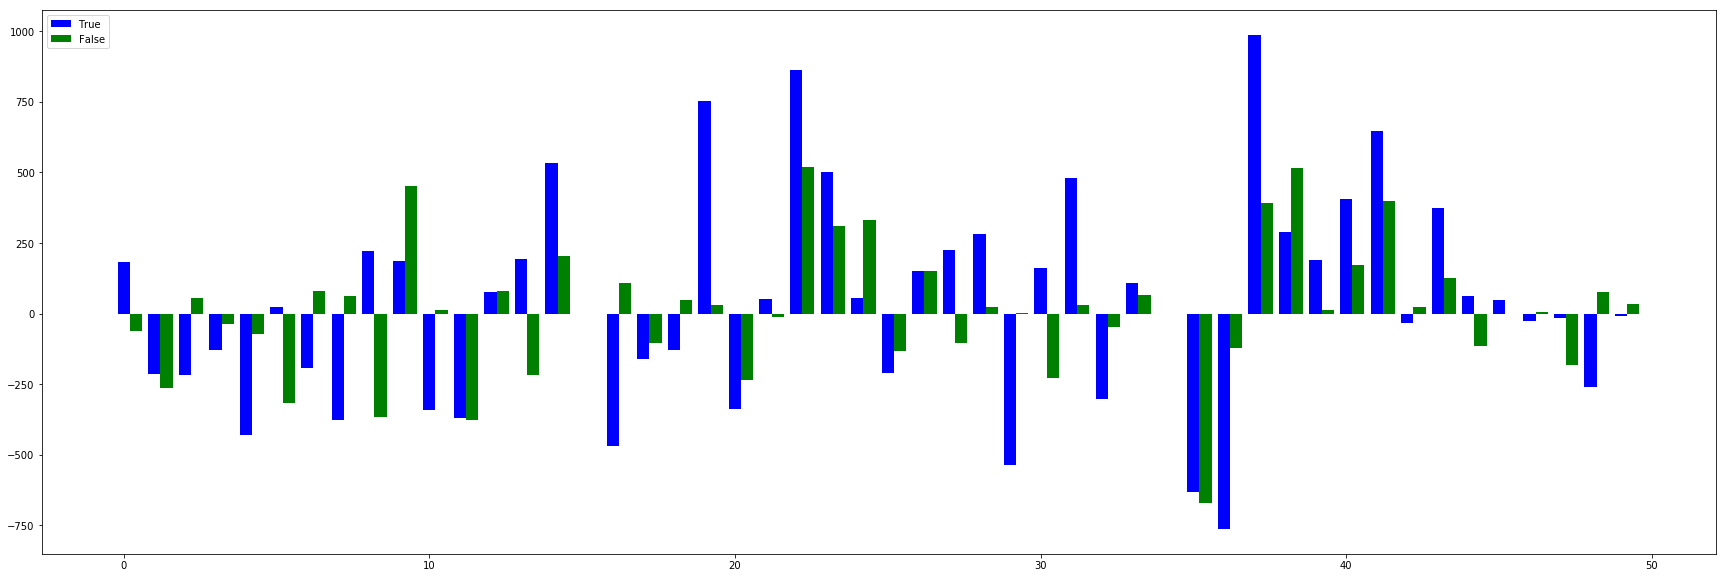

True TOP10
37 986.9538279714667
22 864.2800152341705
36 762.7299435798424
19 753.0992944227729
41 646.3356221546846
35 631.7156334200944
29 537.1350167236585
14 534.1357525448902
23 502.14210617832583
31 479.4521898955022
False TOP10
35 669.9164901415198
22 521.0283694179051
38 515.9590792216254
9 450.2862600988831
41 398.79517817641545
37 393.3795382104574
11 377.9469098234922
8 365.5244382695489
24 332.5269824610684
5 317.4944166898392


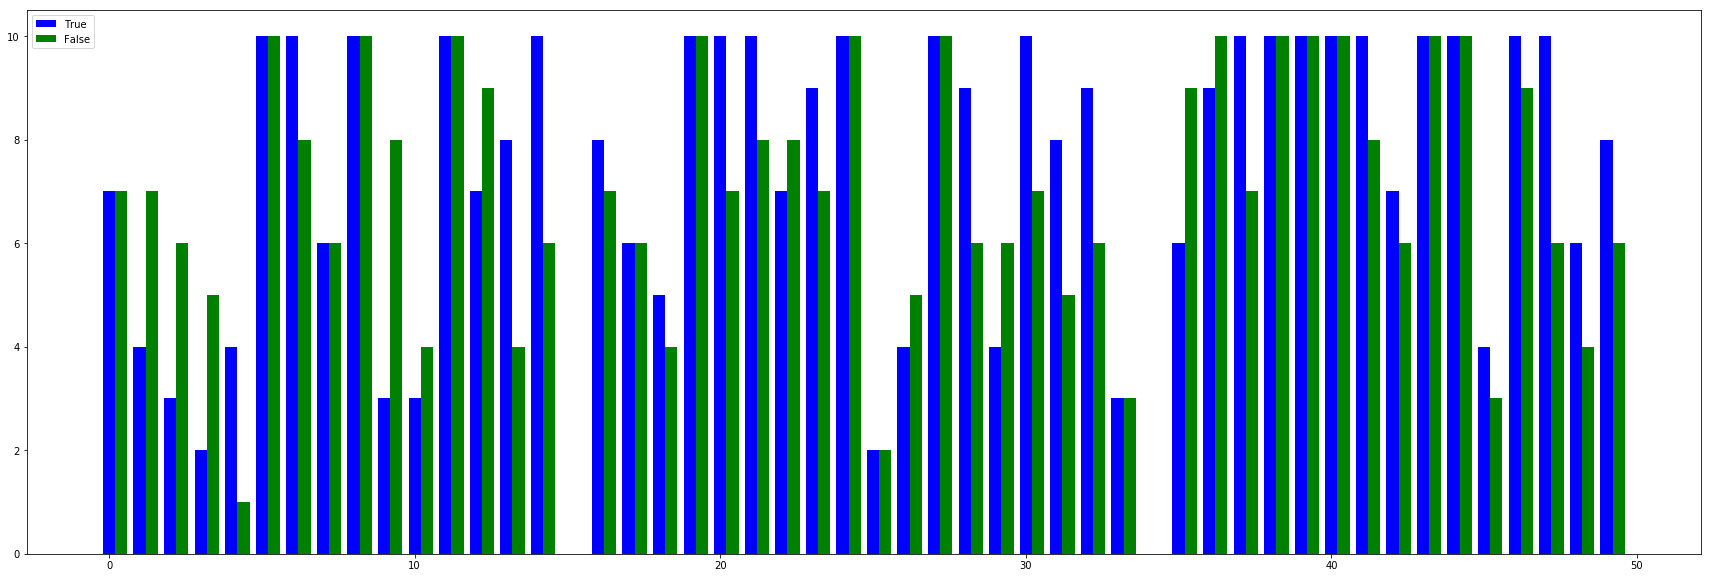

True TOP10
24 10.0
38 10.0
20 10.0
19 10.0
27 10.0
30 10.0
14 10.0
11 10.0
8 10.0
37 10.0
False TOP10
24 10.0
40 10.0
27 10.0
19 10.0
11 10.0
36 10.0
38 10.0
39 10.0
8 10.0
43 10.0
44 10.0
5 10.0
35 9.0
12 9.0
46 9.0
41 8.0
6 8.0
9 8.0
21 8.0
22 8.0
23 7.0
16 7.0
20 7.0
1 7.0
0 7.0
30 7.0
37 7.0
32 6.0
14 6.0
47 6.0
2 6.0
42 6.0
7 6.0
49 6.0
17 6.0
29 6.0
28 6.0
31 5.0
3 5.0
26 5.0
13 4.0
10 4.0
18 4.0
48 4.0
33 3.0
45 3.0
25 2.0
4 1.0
15 0.0
34 0.0


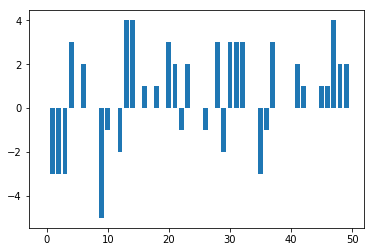

True - False TOP10
9 5.0
14 4.0
47 4.0
13 4.0
37 3.0
20 3.0
28 3.0
30 3.0
32 3.0
35 3.0
#############################
9


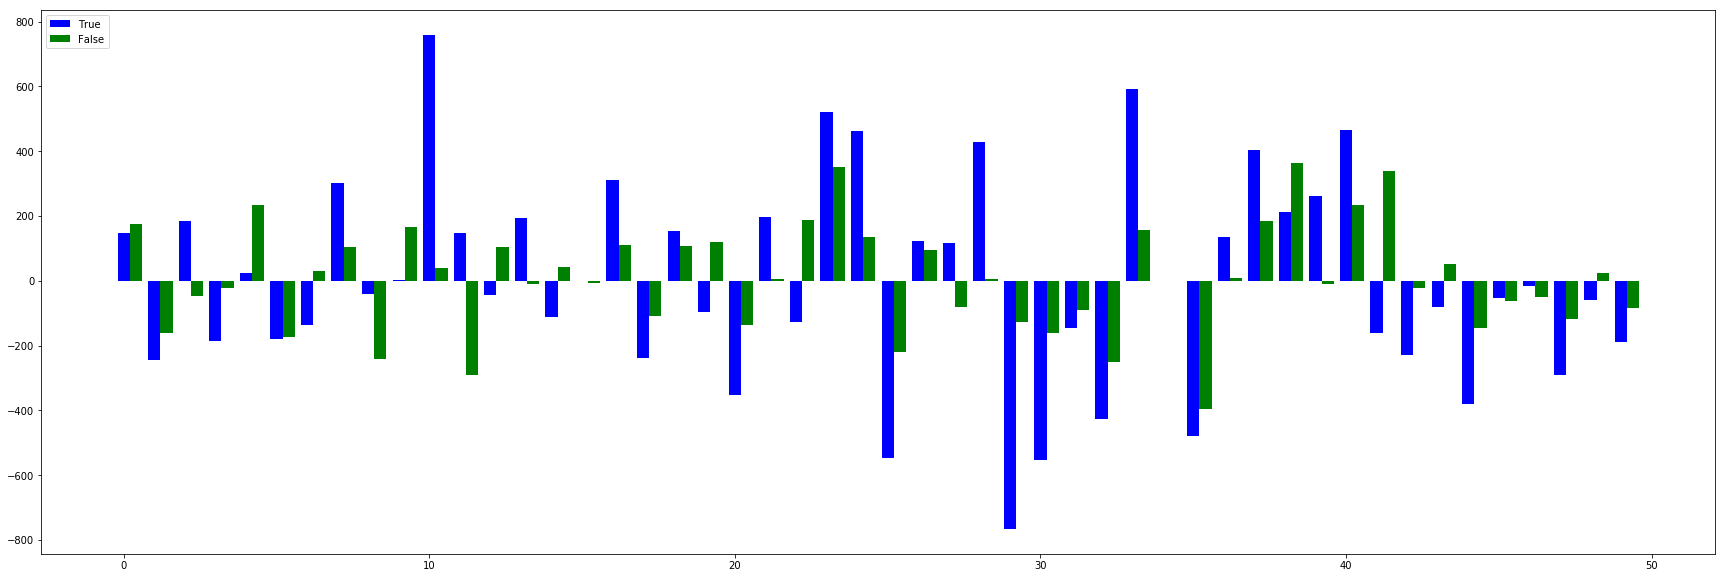

True TOP10
29 766.6484487739756
10 758.80030130464
33 592.5683731739196
30 552.2408462102658
25 546.5833648444914
23 521.7340221028873
35 478.50843870998375
40 464.8911051884835
24 462.7139275657522
28 429.16150091894065
False TOP10
35 396.1621282605601
38 362.2314219718469
23 351.2174817647355
41 337.94849785585615
11 291.9379526618617
32 252.0806595212256
8 241.97021075647623
4 235.18541489460773
40 234.72314935296328
25 218.61080024040956


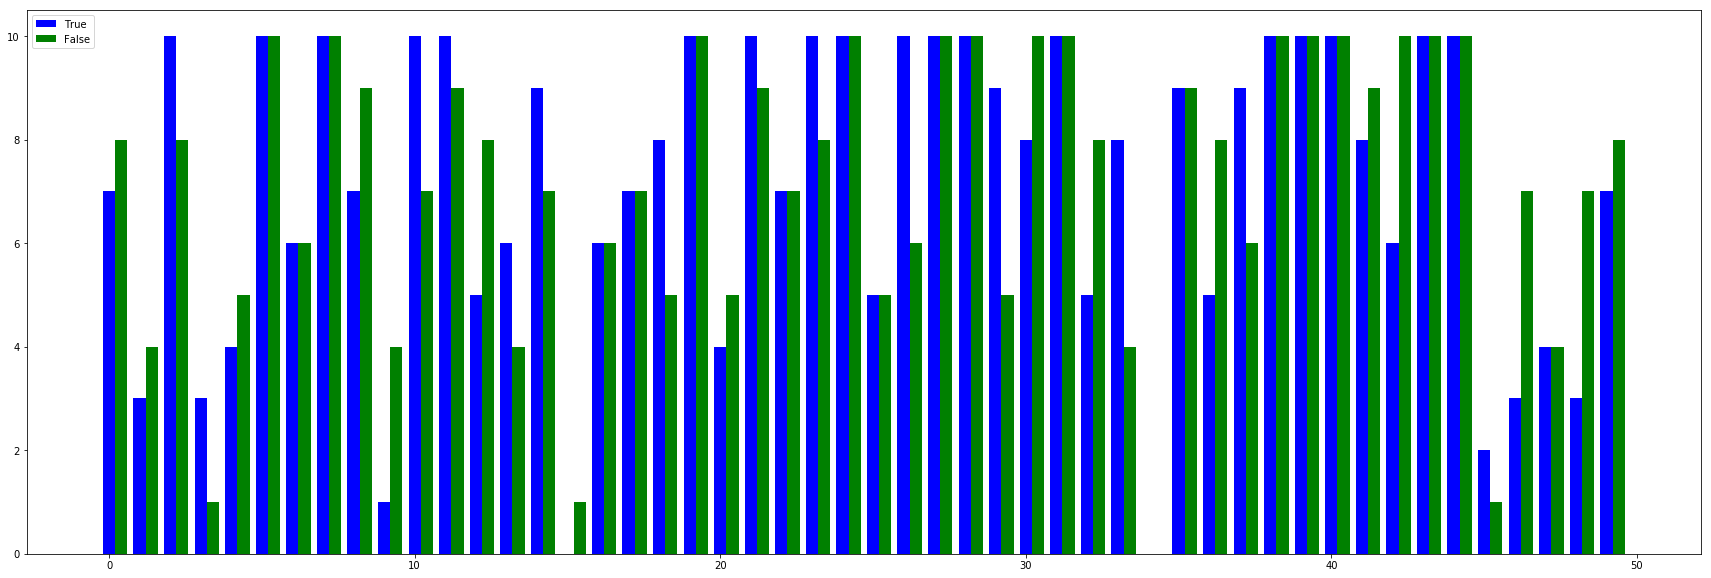

True TOP10
24 10.0
38 10.0
23 10.0
26 10.0
27 10.0
28 10.0
31 10.0
11 10.0
21 10.0
10 10.0
False TOP10
24 10.0
40 10.0
30 10.0
31 10.0
19 10.0
27 10.0
39 10.0
38 10.0
42 10.0
43 10.0
44 10.0
7 10.0
5 10.0
28 10.0
41 9.0
8 9.0
11 9.0
35 9.0
21 9.0
12 8.0
2 8.0
23 8.0
49 8.0
0 8.0
32 8.0
36 8.0
14 7.0
48 7.0
46 7.0
22 7.0
10 7.0
17 7.0
6 6.0
37 6.0
26 6.0
16 6.0
25 5.0
18 5.0
20 5.0
29 5.0
4 5.0
9 4.0
33 4.0
47 4.0
1 4.0
13 4.0
15 1.0
45 1.0
3 1.0
34 0.0


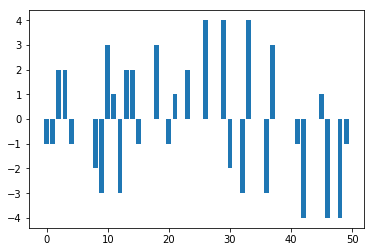

True - False TOP10
33 4.0
48 4.0
46 4.0
26 4.0
29 4.0
42 4.0
36 3.0
18 3.0
9 3.0
10 3.0
#############################


In [32]:
for i in range(10):
    print(i)
    true_nums = true_list[i][:10]
#     print(len(true_nums))
    false_nums = false_list[i][:10]
#     print(len(false_nums))
    
    compare_g(true_nums, false_nums, i)
    compare_c(true_nums, false_nums, i)
    
    print("#############################")

In [23]:
def all_g_x(nums, label):
    li = np.zeros(784)
    for i in nums:
        g = network.gradient(x_test[i].reshape(1, 784), np.array([label]))
        li += np.sum(g['W1'], axis=1)
        
    return li
    

In [24]:
def all_c_x(nums, label):
    li = np.zeros(784)
    for i in nums:
        g = network.gradient(x_test[i].reshape(1, 784), np.array([label]))
        li += (np.sum(g['W1'], axis=1) != 0)
        
    return li
    

In [25]:
def compare_g_x(t_nums, f_nums, label):
    t = all_g_x(t_nums, label)
    f = all_g_x(f_nums, label)
    
    
    fig = plt.figure(figsize=(20, 20))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    ax1.set_title("True sum of grads")
    ax1.imshow(t.reshape(28,28))
    ax2.set_title("False sum of grads")
    ax2.imshow(f.reshape(28,28))
    ax3.set_title("True- False sum of grads")
    ax3.imshow((t-f).reshape(28,28))
    
    plt.show()
    
    t_img = np.zeros(784)
    f_img = np.zeros(784)
    
    t_idx = []
    f_idx = []
    
    for i in range(100):
        t_idx.append(np.argsort(abs(t))[::-1][i])
        f_idx.append(np.argsort(abs(f))[::-1][i])
    
    for t_i, f_i in zip(t_idx, f_idx):
        t_img[t_i] = t[t_i]
        f_img[f_i] = f[t_i]
        
    fig = plt.figure(figsize=(20, 20))
    ax4 = fig.add_subplot(1, 3, 1)
    ax5 = fig.add_subplot(1, 3, 2)
    ax6 = fig.add_subplot(1, 3, 3)
    ax4.set_title("True sum of grads")
    ax4.imshow(t_img.reshape(28,28))
    ax5.set_title("False sum of grads")
    ax5.imshow(f_img.reshape(28,28))
    ax6.set_title("True - False sum of grads")
    ax6.imshow((t_img - f_img).reshape(28,28))
    
    plt.show()
    
    return t_img, f_img*0.01
    

In [33]:
def compare_c_x(t_nums, f_nums, label):
    t = all_c_x(t_nums, label)
    f = all_c_x(f_nums, label)
    
    fig = plt.figure(figsize=(20, 20))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    ax1.set_title("True counts of grads")
    ax1.imshow(t.reshape(28,28))
    ax2.set_title("False counts of grads")
    ax2.imshow(f.reshape(28,28))
    ax3.set_title("True- False counts of grads")
    ax3.imshow((t-f).reshape(28,28))
    
    plt.show()
    
    t_img = np.zeros(784)
    f_img = np.zeros(784)
    
    t_idx = []
    f_idx = []
    
    for i in range(50):
        t_idx.append(np.argsort(t)[::-1][i])
        f_idx.append(np.argsort(f)[::-1][i])
    
    for t_i, f_i in zip(t_idx, f_idx):
        t_img[t_i] = t[t_i]
        f_img[f_i] = f[t_i]
        
    
    fig = plt.figure(figsize=(20, 20))
    ax4 = fig.add_subplot(1, 3, 1)
    ax5 = fig.add_subplot(1, 3, 2)
    ax6 = fig.add_subplot(1, 3, 3)
    ax4.set_title("True counts of grads")
    ax4.imshow(t_img.reshape(28,28))
    ax5.set_title("False counts of grads")
    ax5.imshow(f_img.reshape(28,28))
    ax6.set_title("True - False counts of grads")
    ax6.imshow((t_img - f_img).reshape(28,28))
    
    plt.show()
    
    return t_img, f_img
        
    
    

0
入力値への勾配の合計


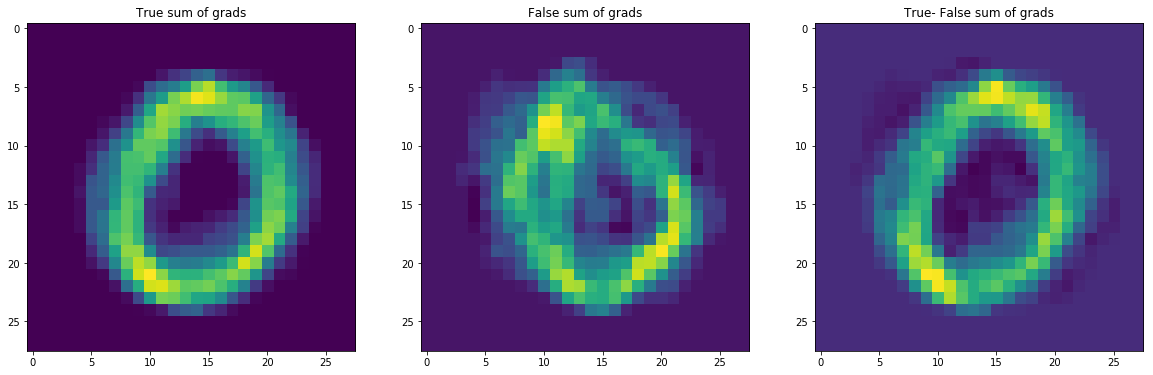

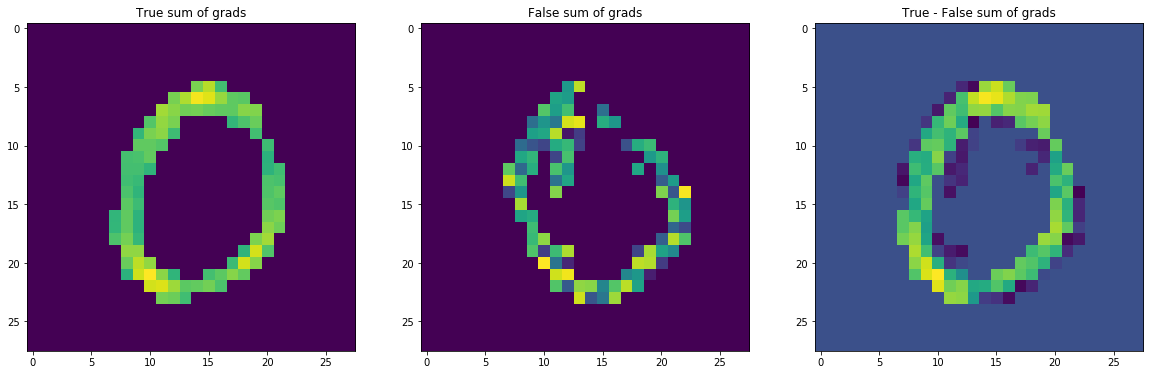

0
1.0
5
0.23086060705649272
0
1.0


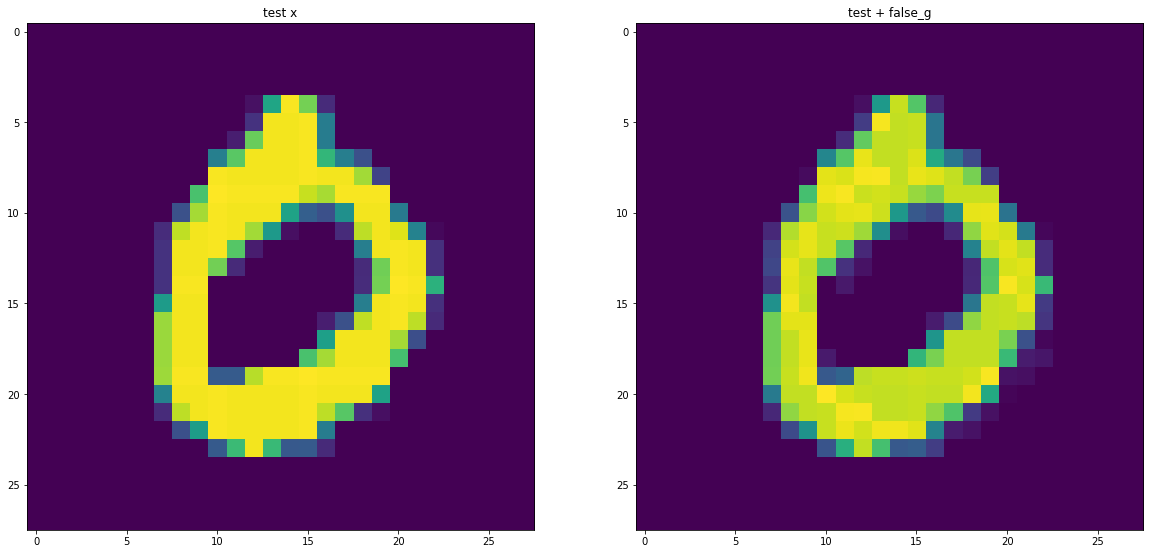

test x
0
0.999104281493455
test + false_g
0
0.9993421663513369
--------------------------
関わった入力値への回数


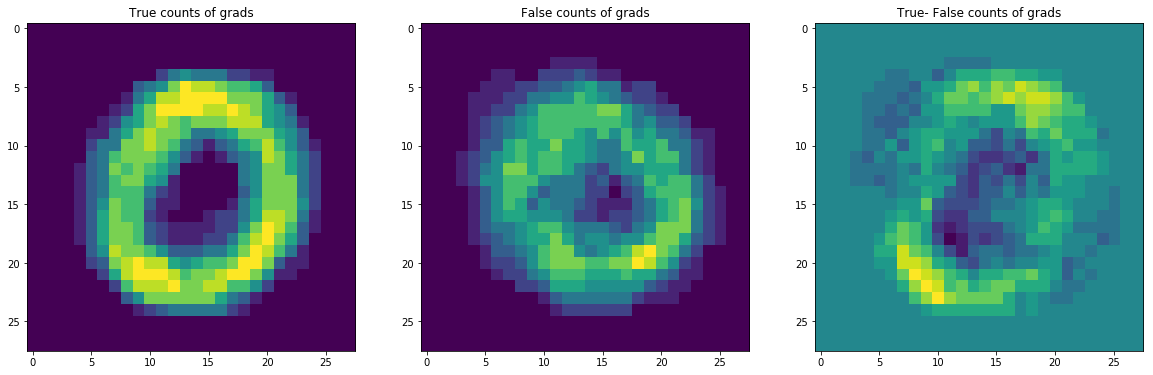

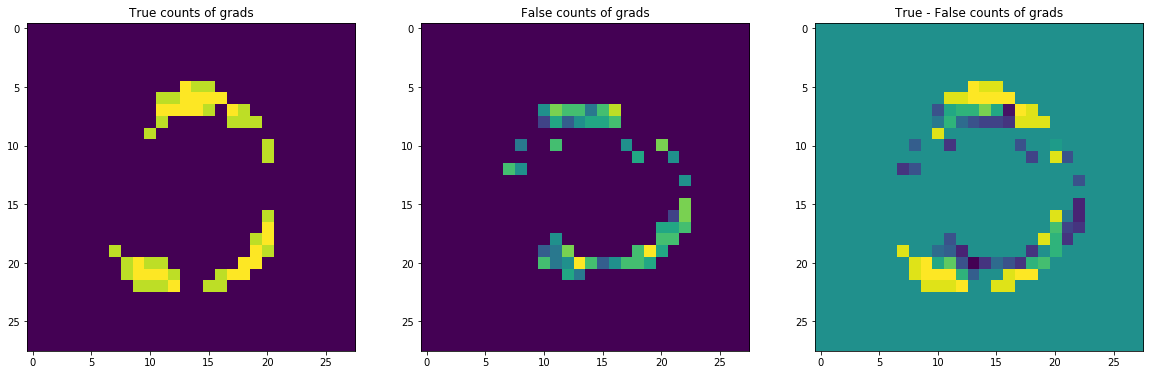

2
0.999874556599121
0
0.46936035222750294
2
0.9995751138072991


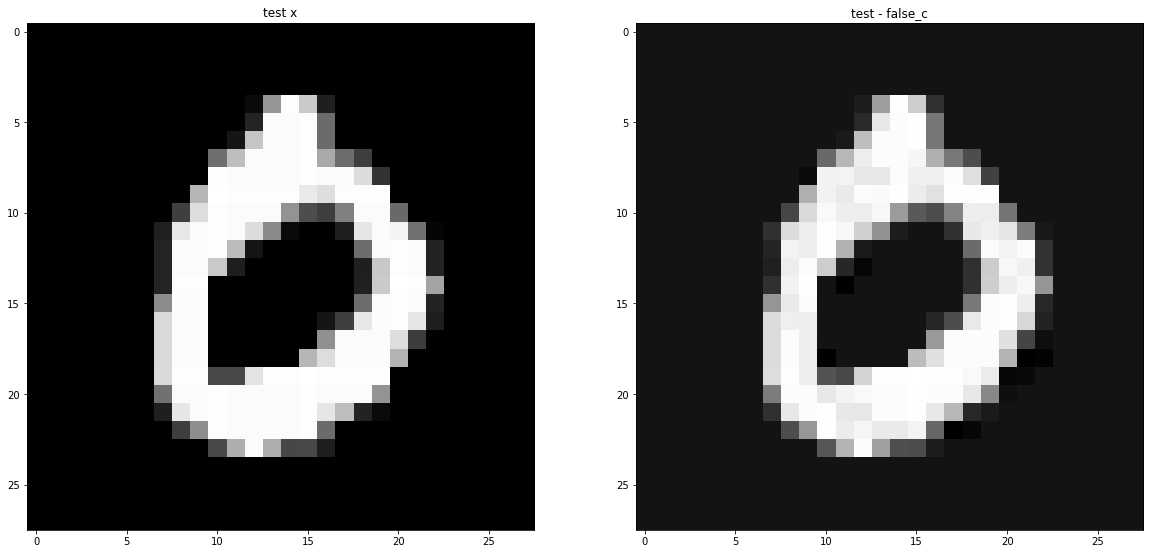

test x
0
0.999104281493455
test - false_c
0
0.9608552630564472
#############################
1
入力値への勾配の合計


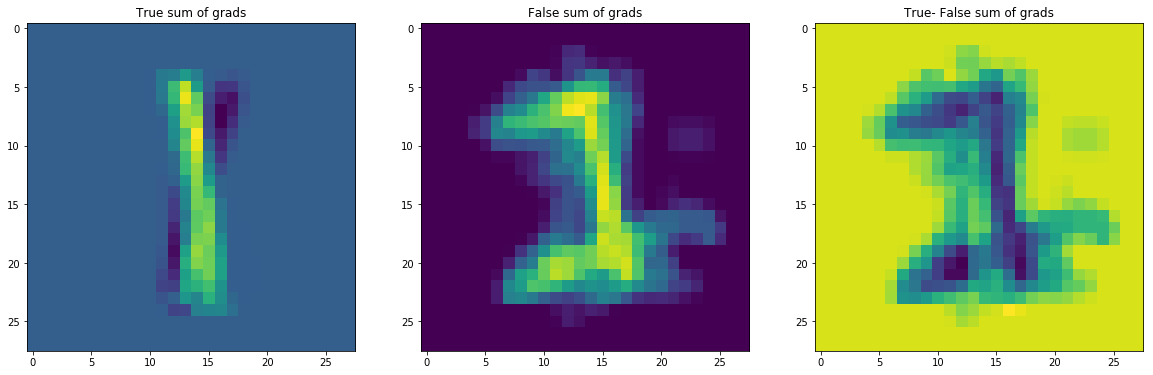

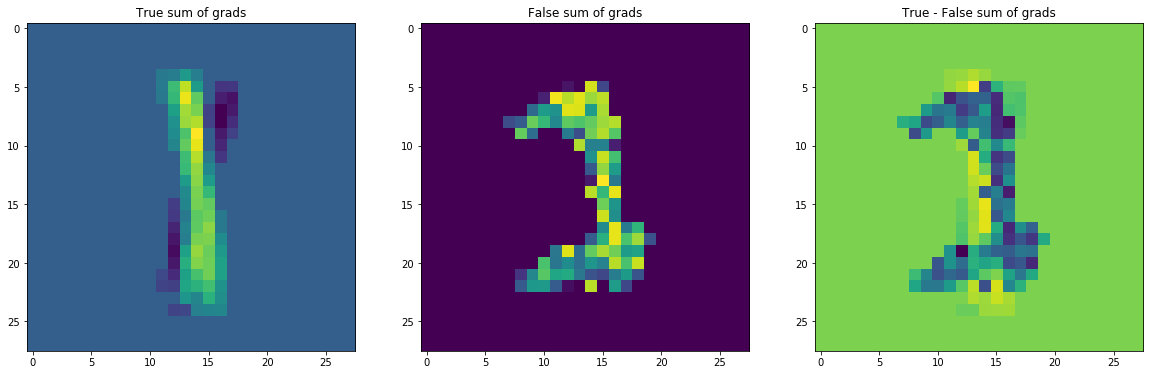

1
0.9999999959087491
7
0.21793427507713026
1
0.9999999946769236


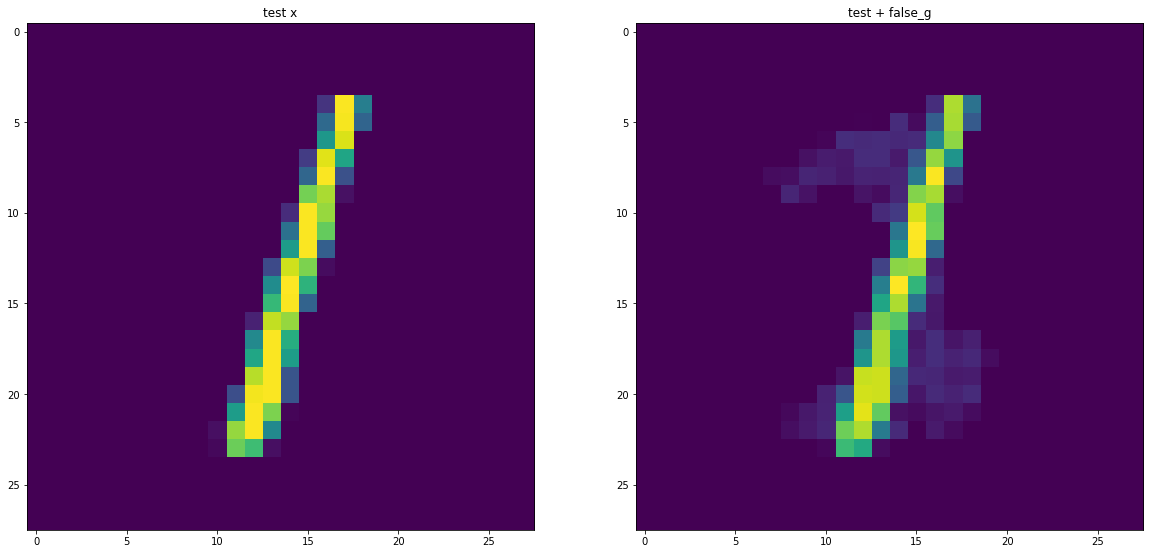

test x
1
0.9881528905151862
test + false_g
1
0.9883762737045318
--------------------------
関わった入力値への回数


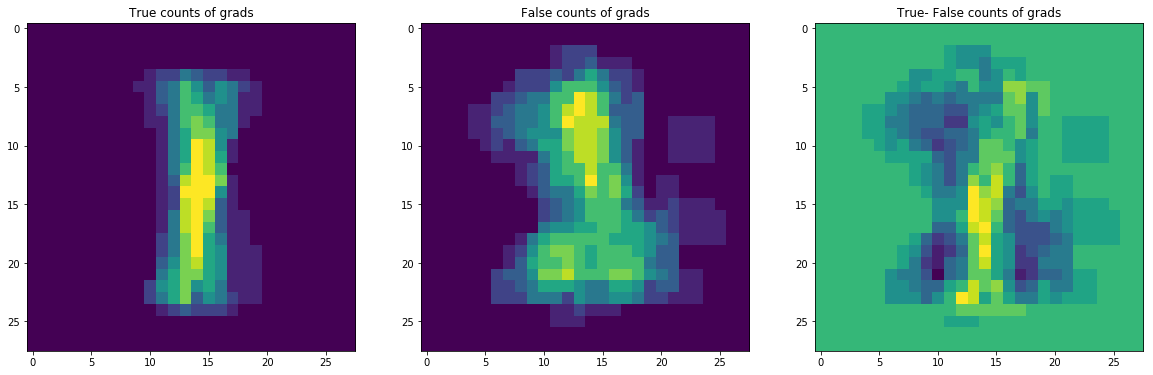

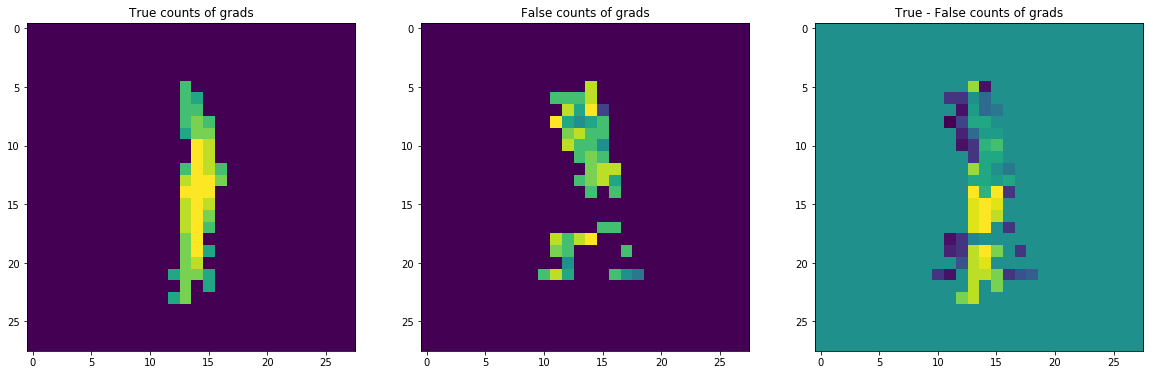

1
1.0
1
0.7821042252779299
1
1.0


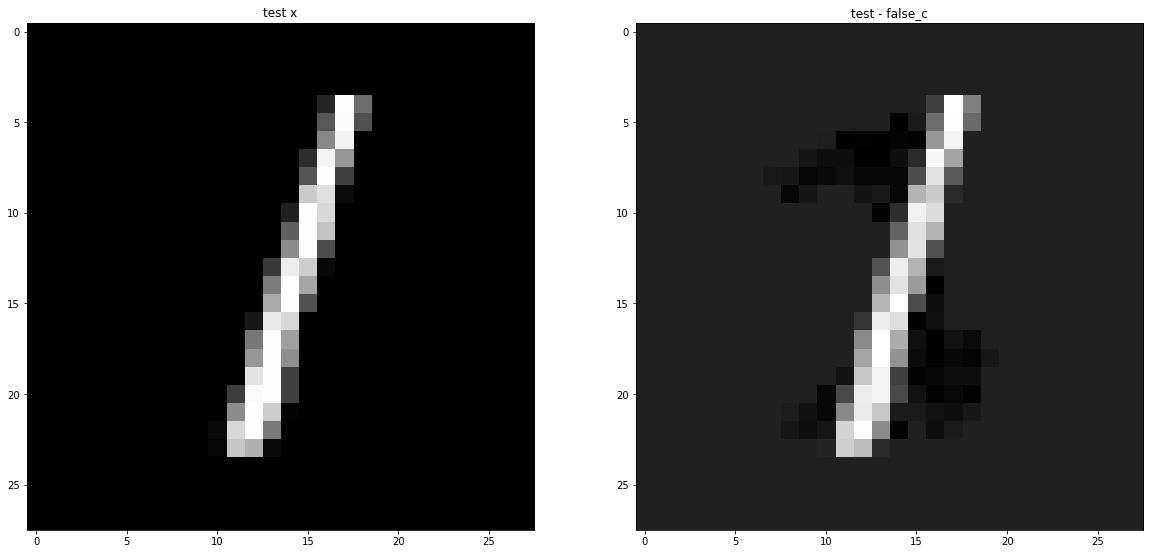

test x
1
0.9881528905151862
test - false_c
5
0.8202751914640972
#############################
2
入力値への勾配の合計


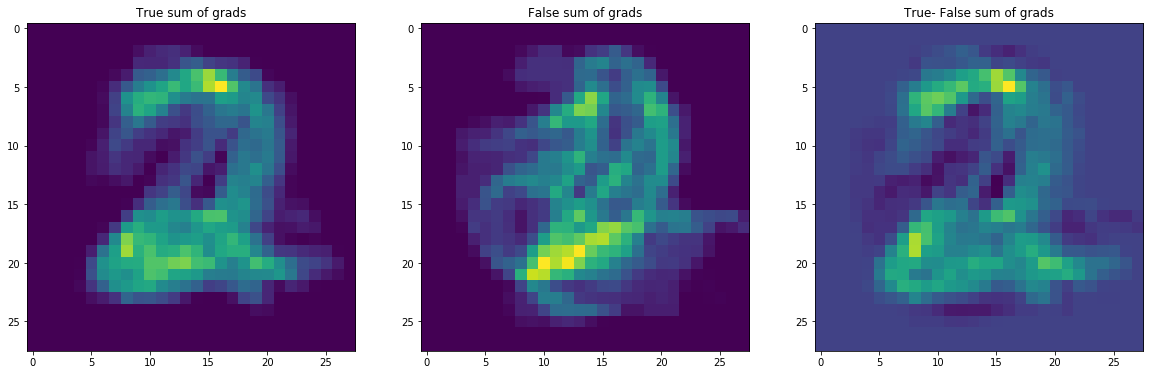

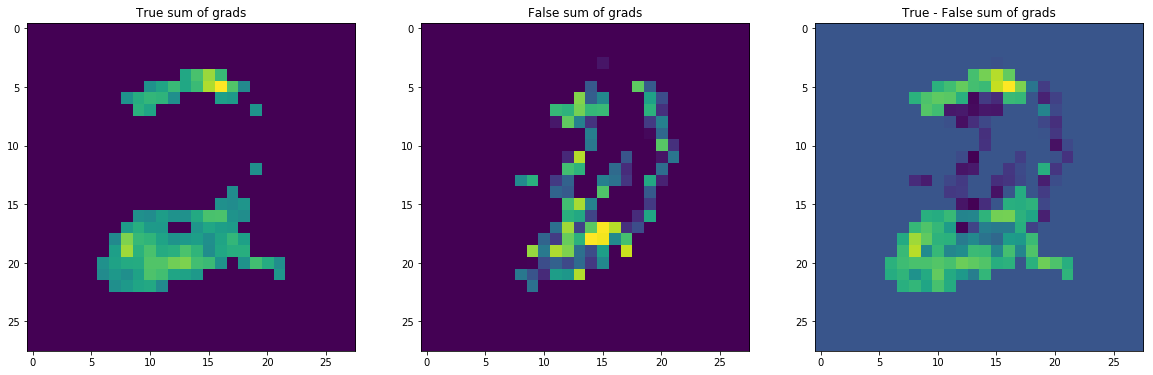

2
1.0
5
0.1944848959689708
2
1.0


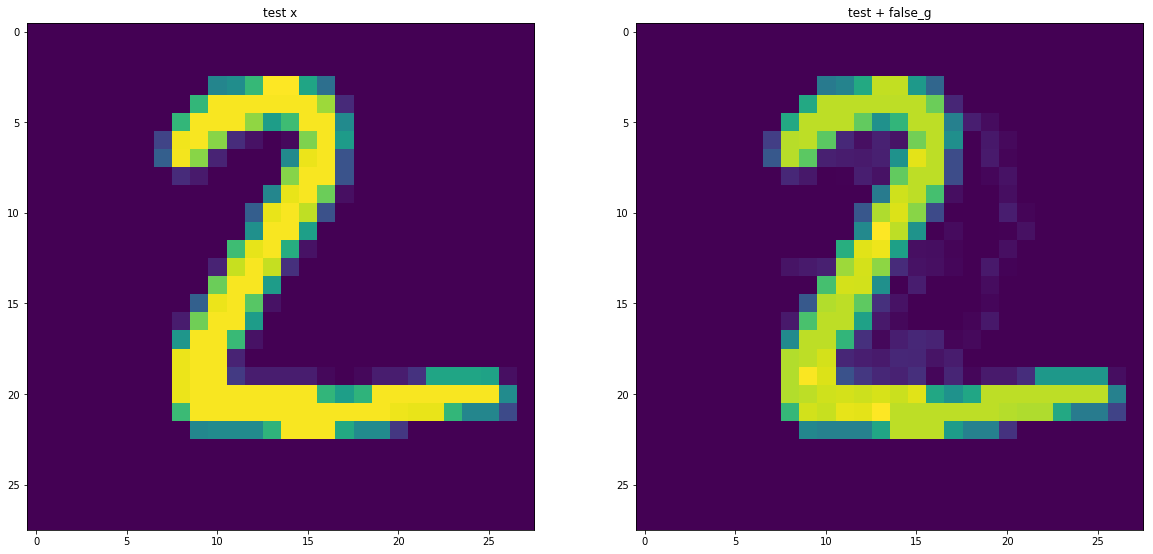

test x
2
0.9967669764932537
test + false_g
2
0.9971198424061237
--------------------------
関わった入力値への回数


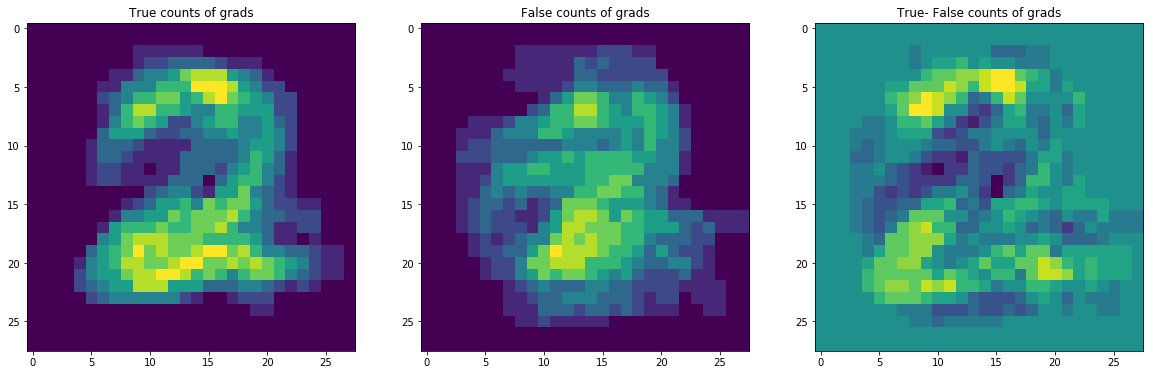

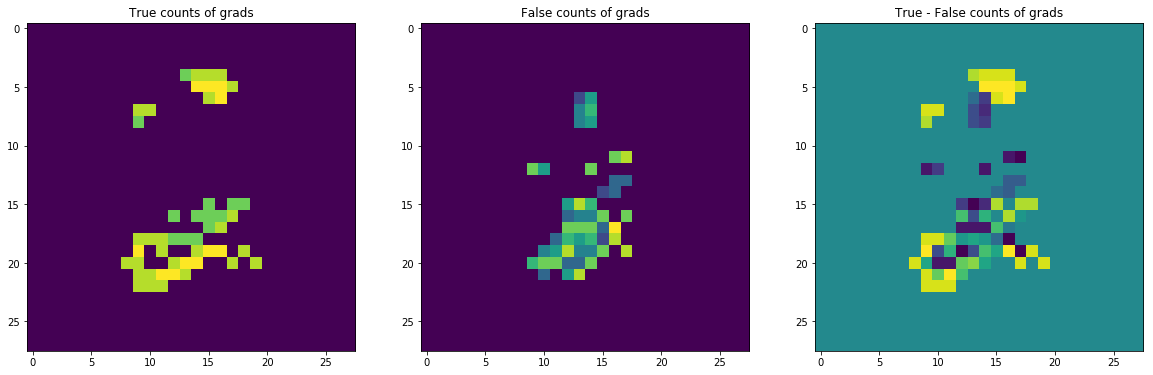

2
0.9999999999999982
6
0.6397987434831915
2
0.9999999999999987


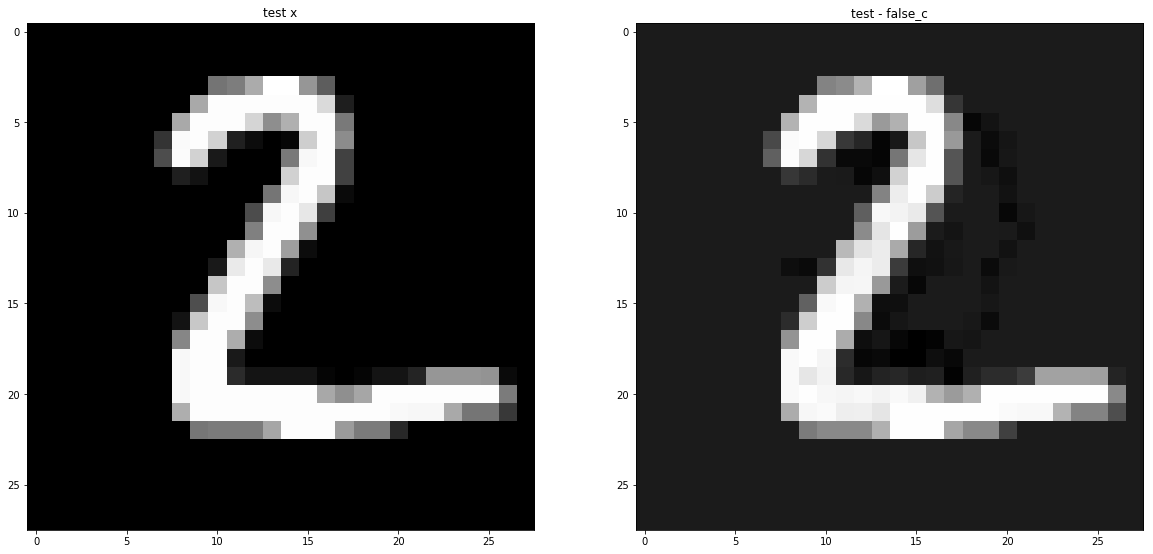

test x
2
0.9967669764932537
test - false_c
0
0.7140460741484309
#############################
3
入力値への勾配の合計


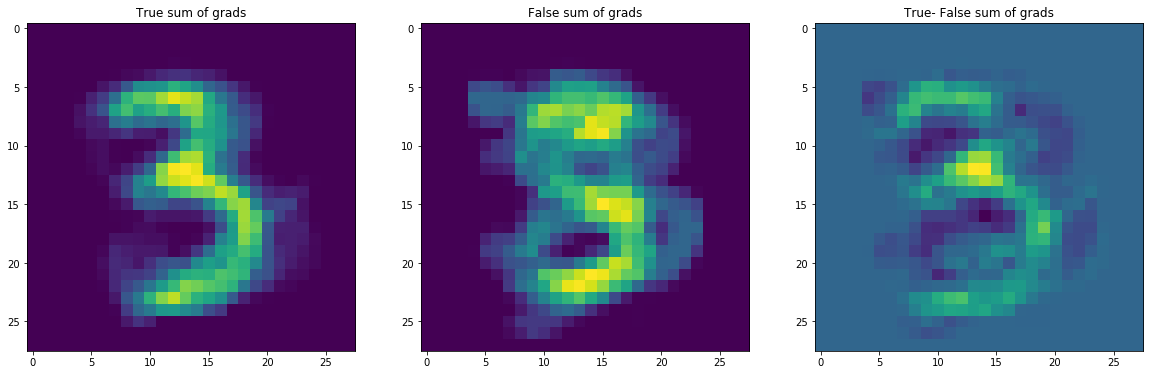

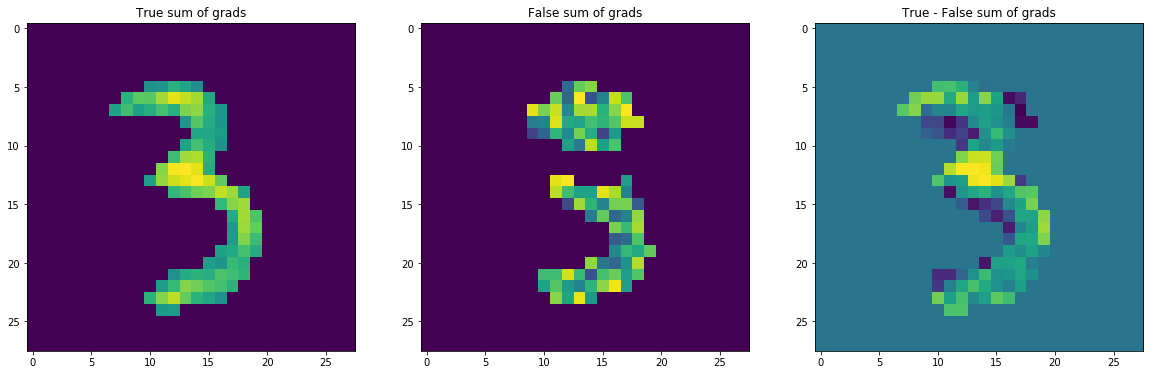

3
1.0
5
0.25196620576517326
3
1.0


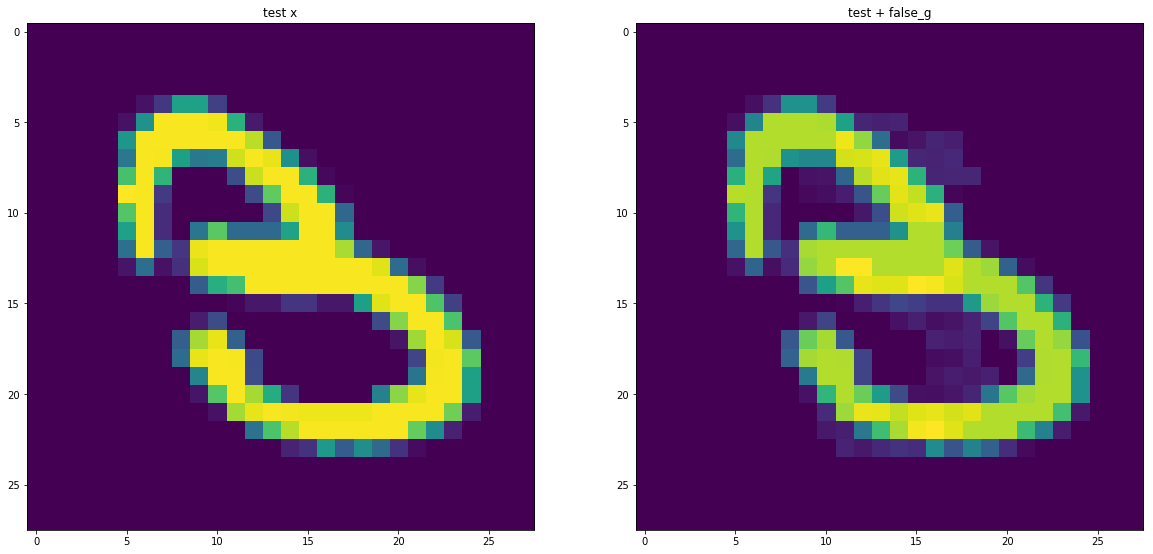

test x
3
0.9257243443578324
test + false_g
3
0.93845253888957
--------------------------
関わった入力値への回数


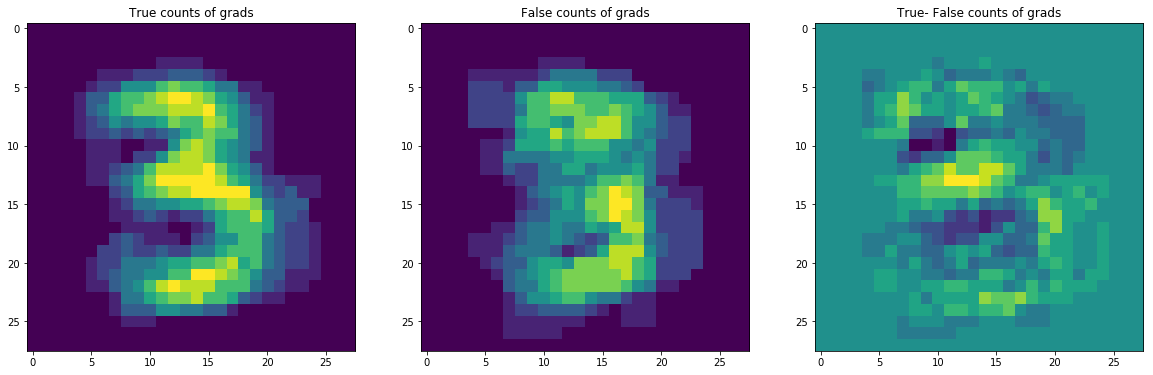

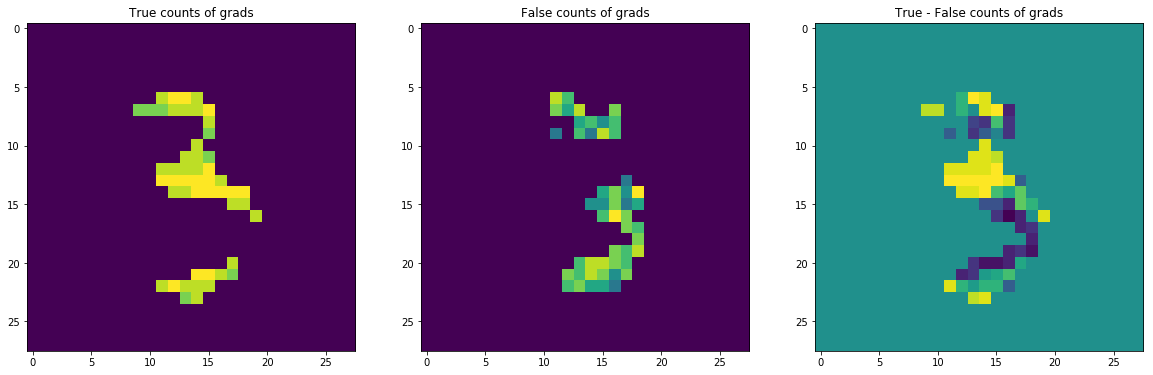

3
0.9999995362858435
7
0.6102937667182443
3
0.9999988499642126


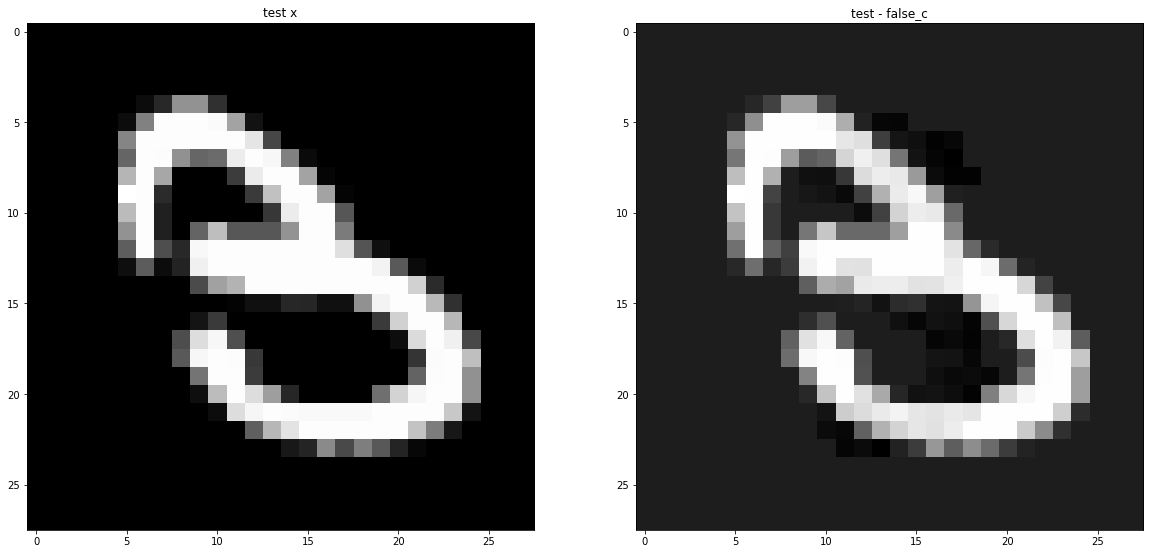

test x
3
0.9257243443578324
test - false_c
3
0.5395843571536868
#############################
4
入力値への勾配の合計


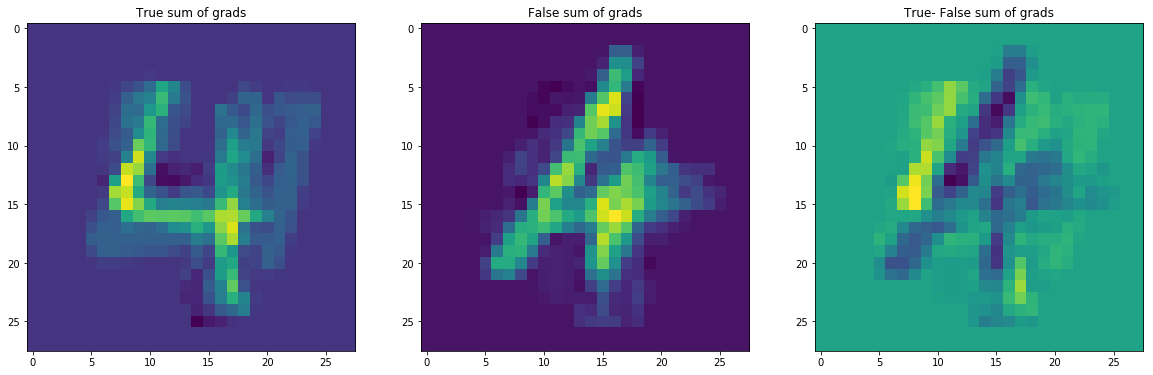

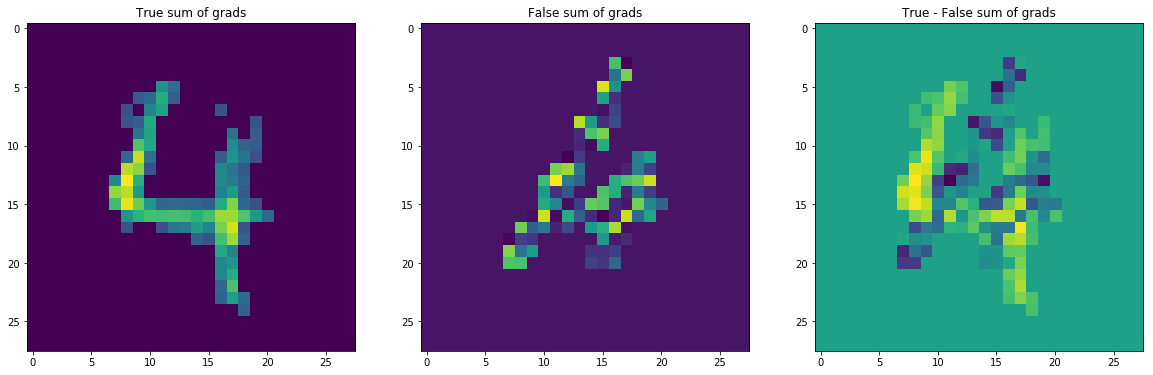

4
1.0
5
0.20607526031680196
4
1.0


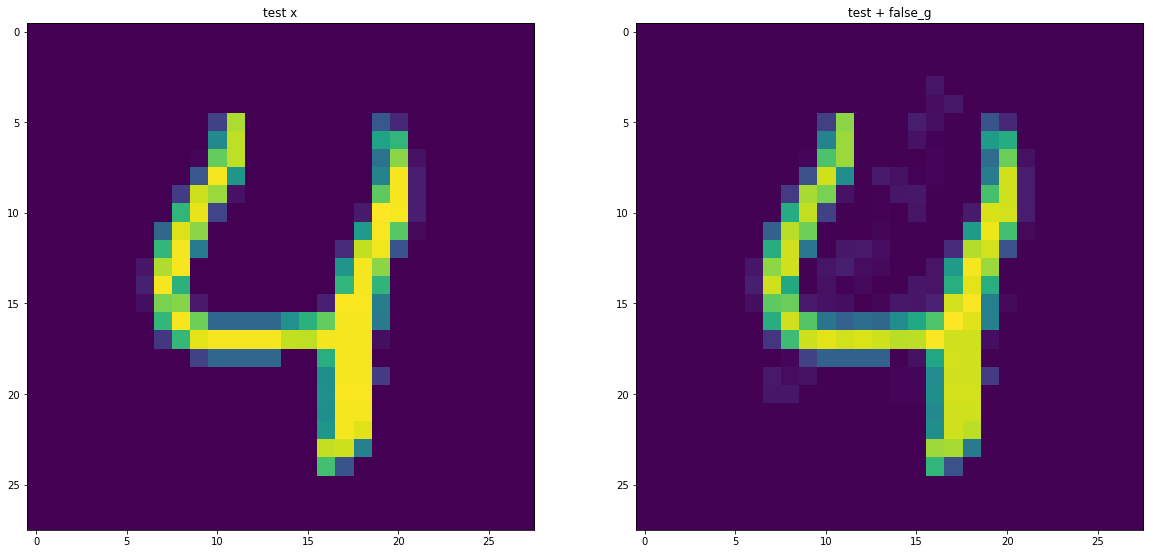

test x
4
0.9860730100759626
test + false_g
4
0.9884559691537138
--------------------------
関わった入力値への回数


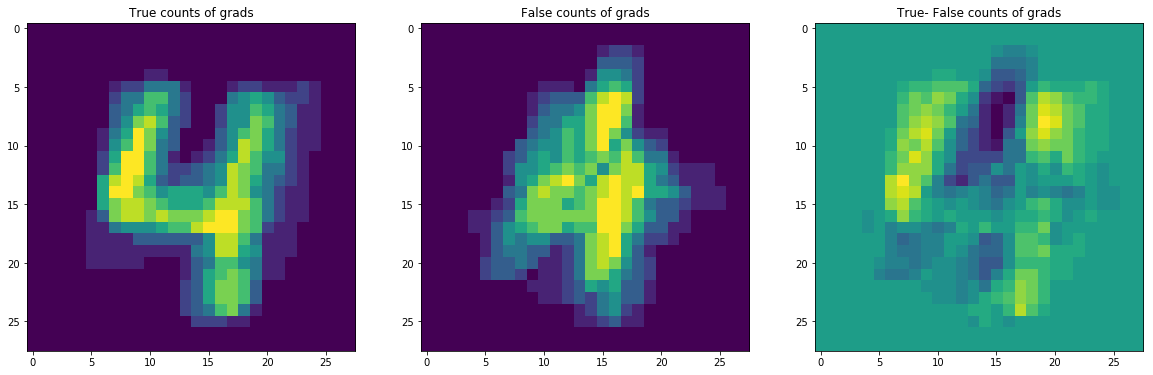

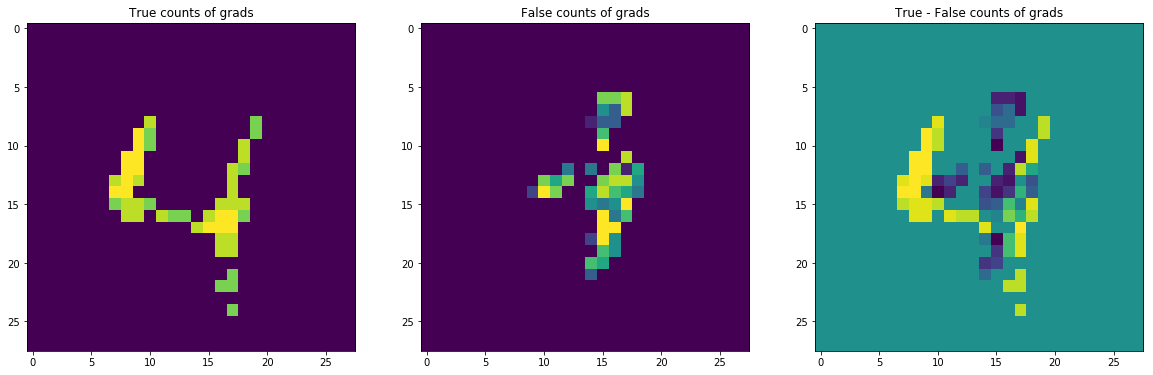

4
1.0
4
0.8004933981608943
4
1.0


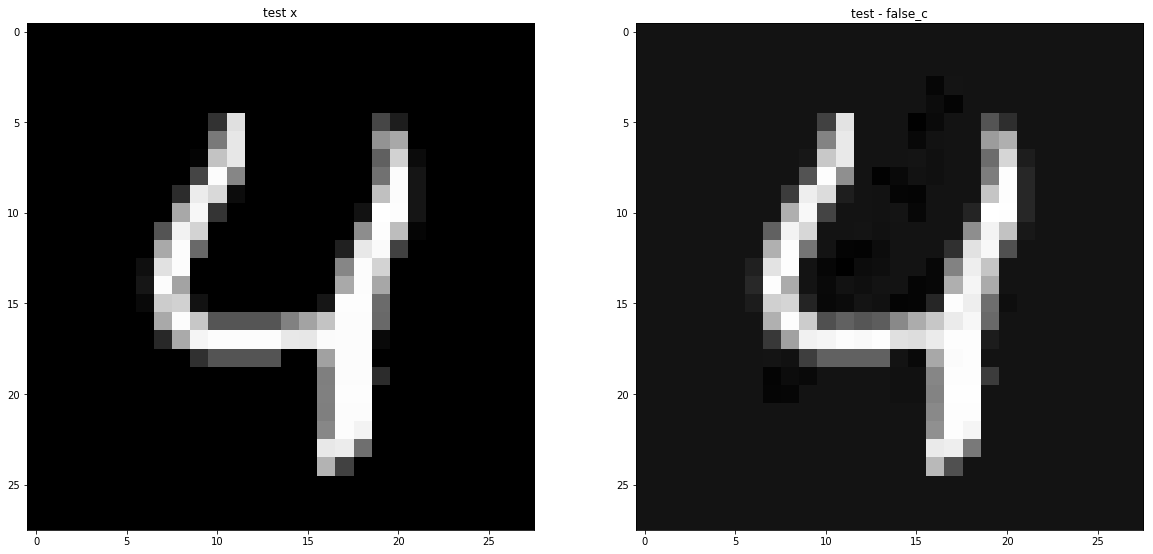

test x
4
0.9860730100759626
test - false_c
5
0.9620834163612535
#############################
5
入力値への勾配の合計


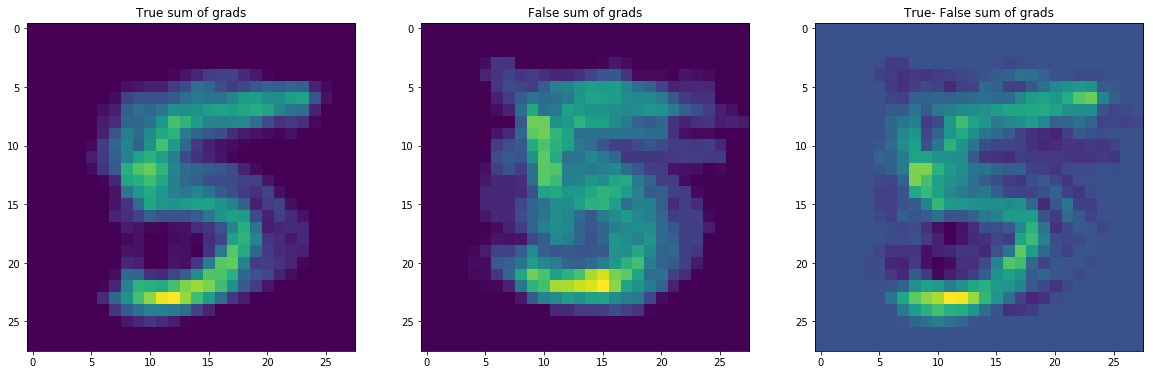

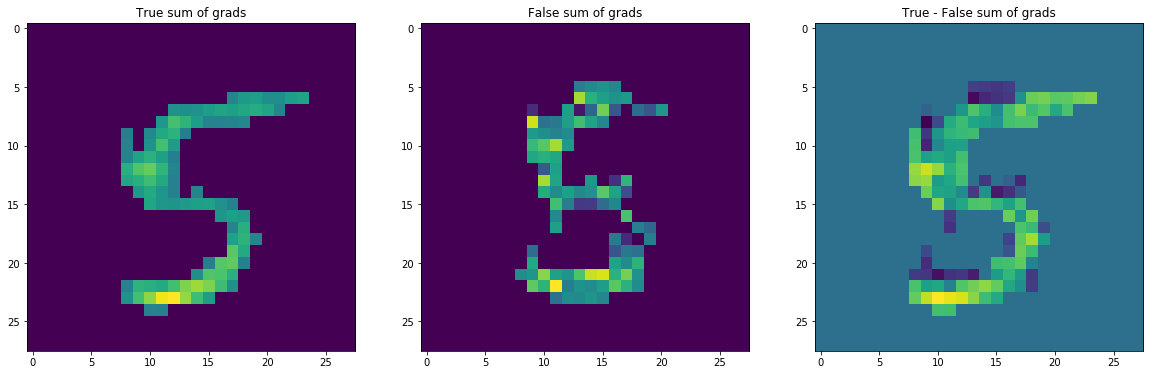

5
1.0
5
0.34078101860324794
5
1.0


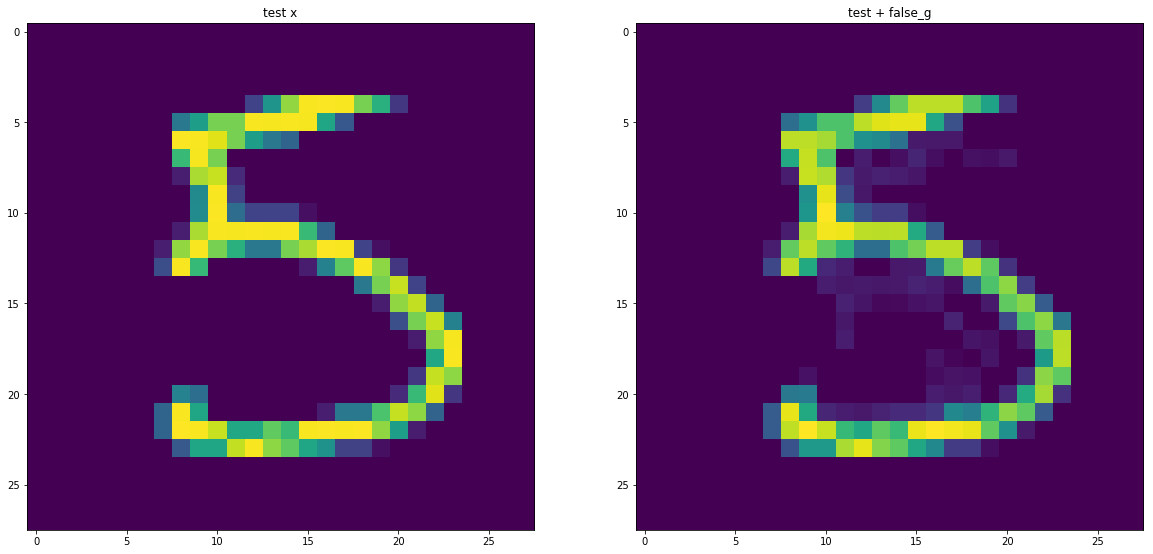

test x
5
0.9743055939520705
test + false_g
5
0.9870320992259382
--------------------------
関わった入力値への回数


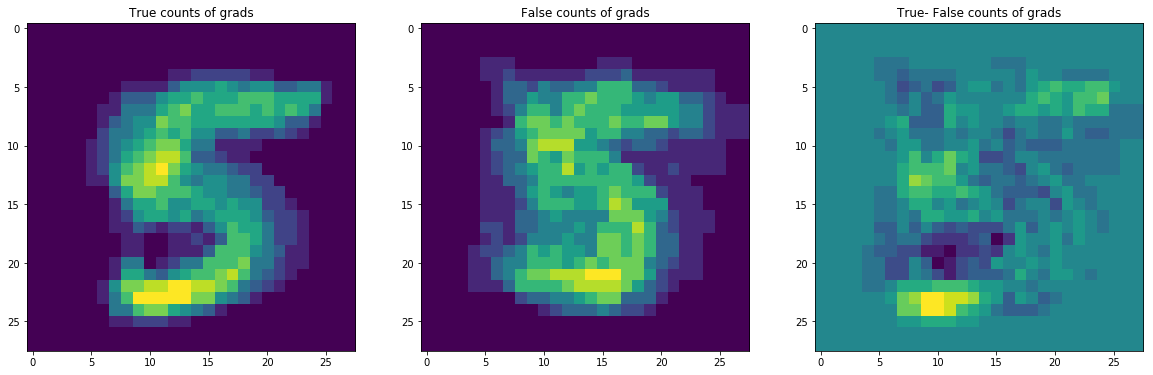

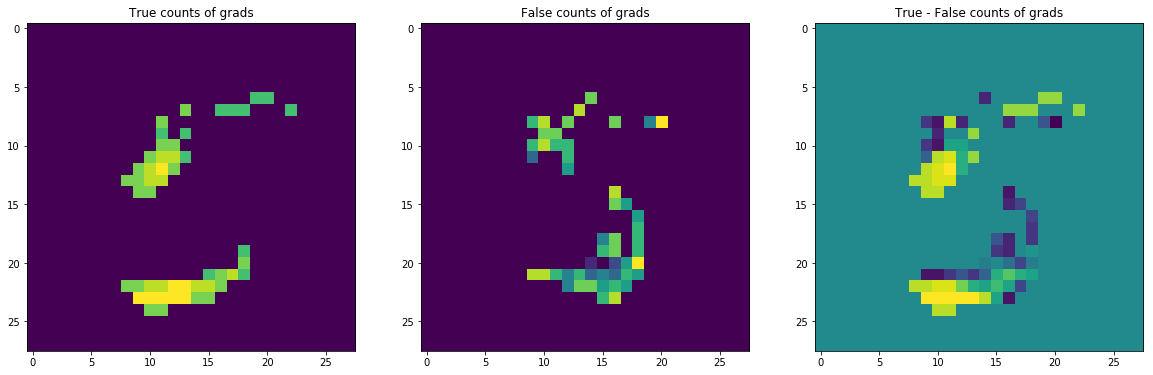

5
1.0
5
0.9140411169536563
5
1.0


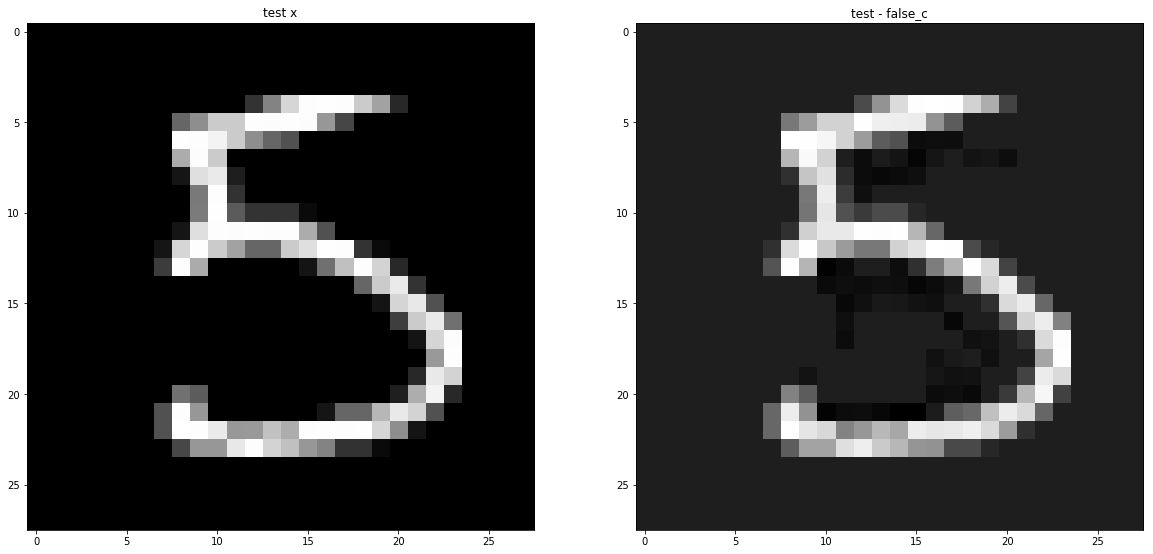

test x
5
0.9743055939520705
test - false_c
3
0.7086484794228248
#############################
6
入力値への勾配の合計


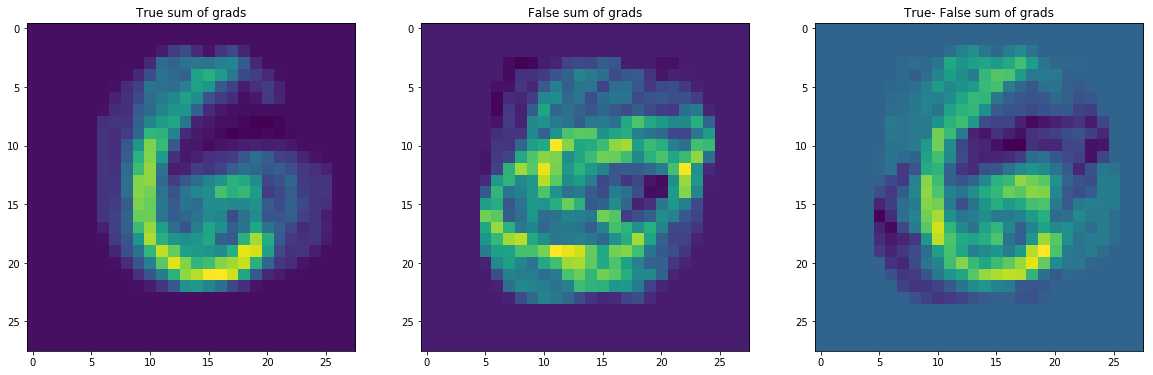

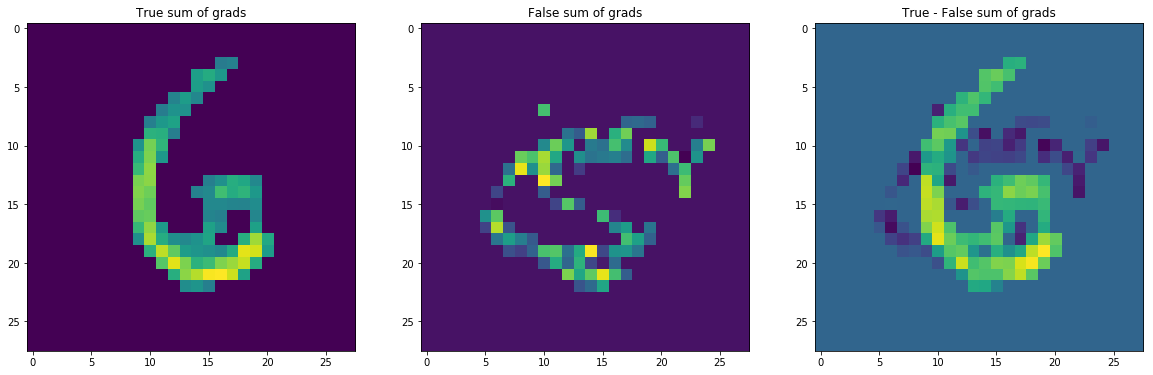

6
1.0
5
0.252765493696393
6
1.0


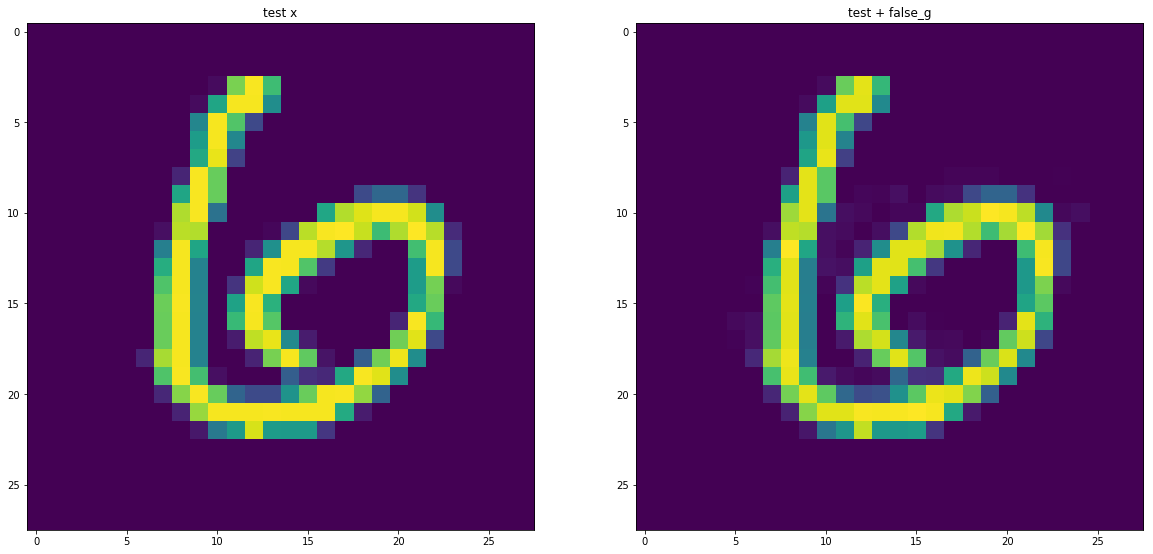

test x
6
0.9941775334874516
test + false_g
6
0.9950885728497018
--------------------------
関わった入力値への回数


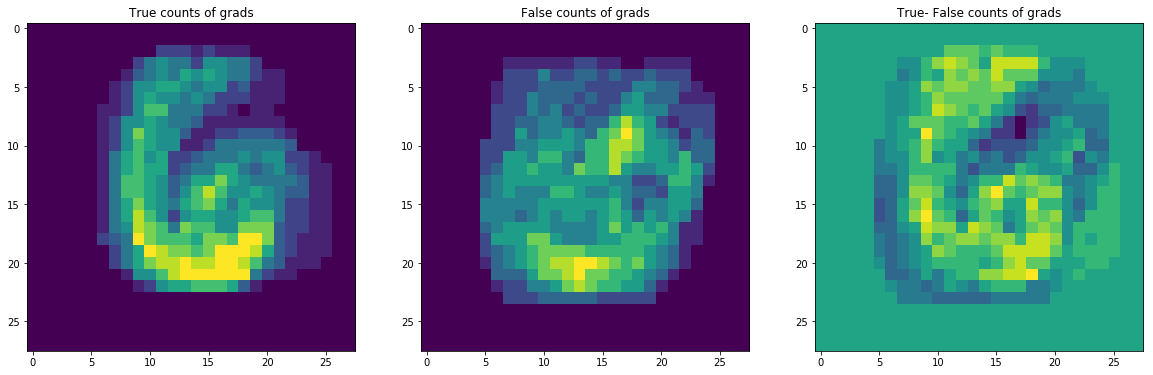

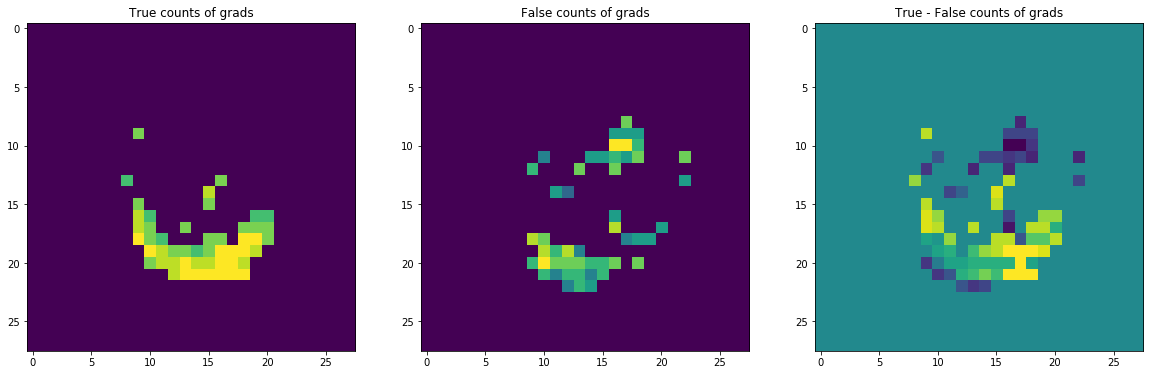

6
0.9999999999993132
0
0.49941176990500324
6
0.9999999999981402


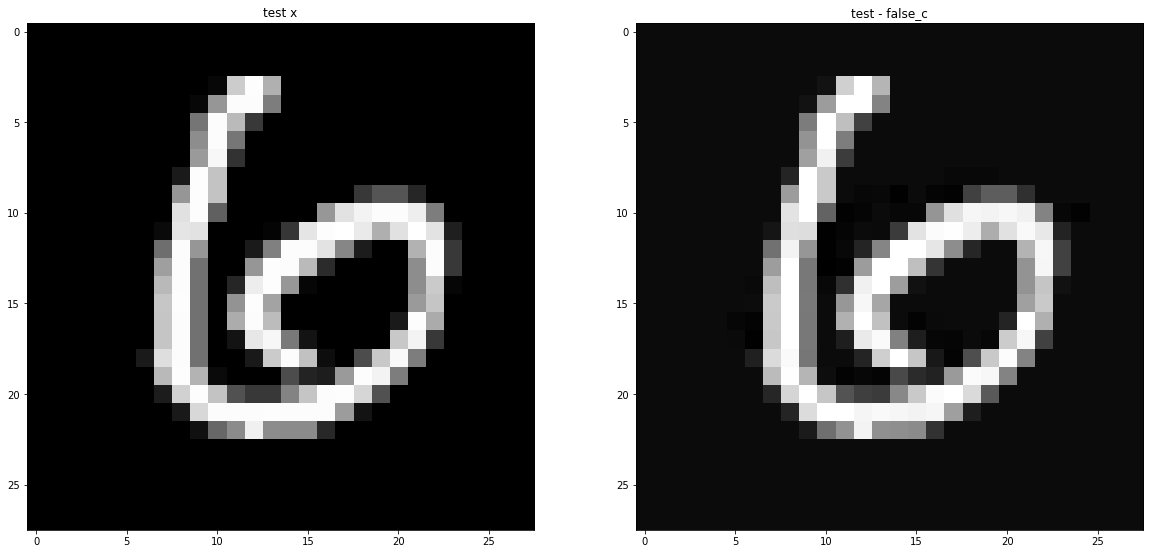

test x
6
0.9941775334874516
test - false_c
8
0.2942246136741637
#############################
7
入力値への勾配の合計


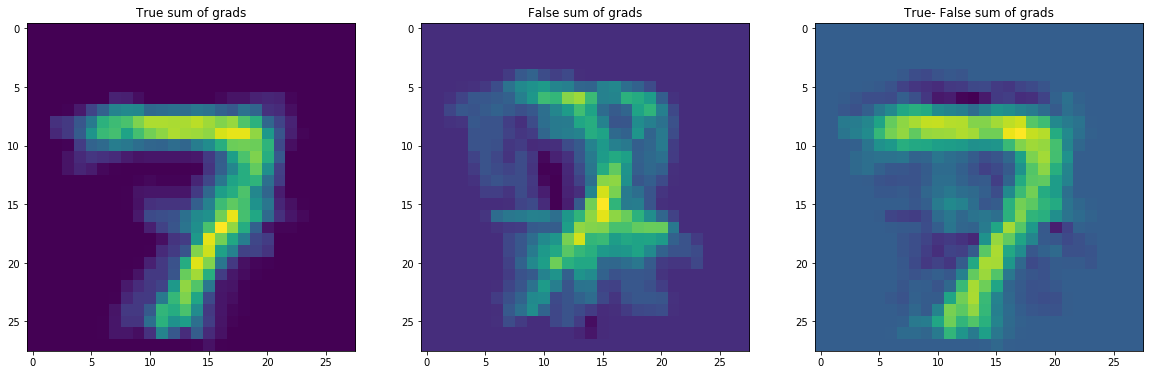

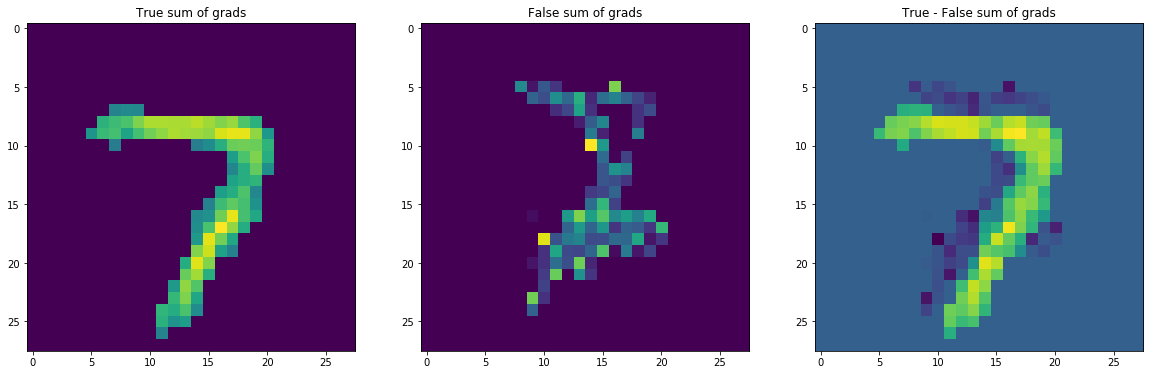

7
1.0
7
0.2178681538499541
7
1.0


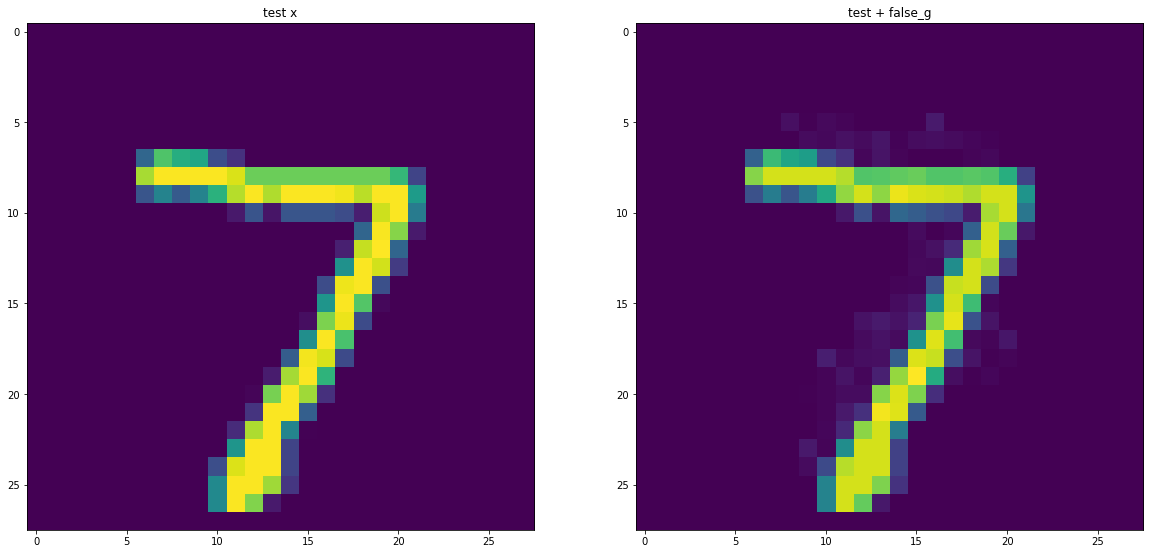

test x
7
0.9963132537478793
test + false_g
7
0.9957227123538845
--------------------------
関わった入力値への回数


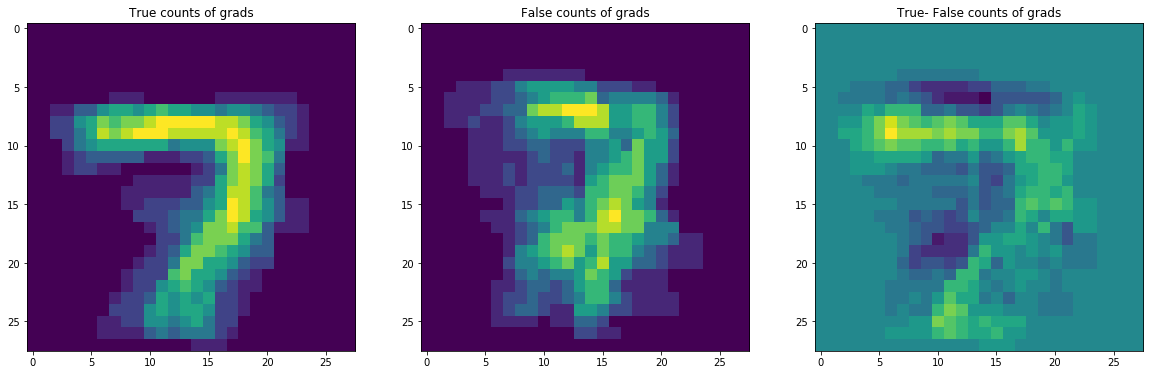

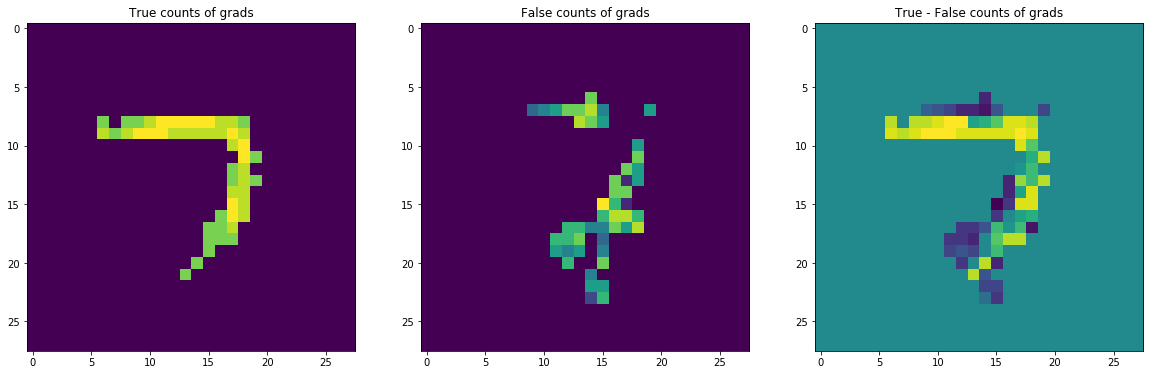

7
1.0
7
0.9423221478580646
7
1.0


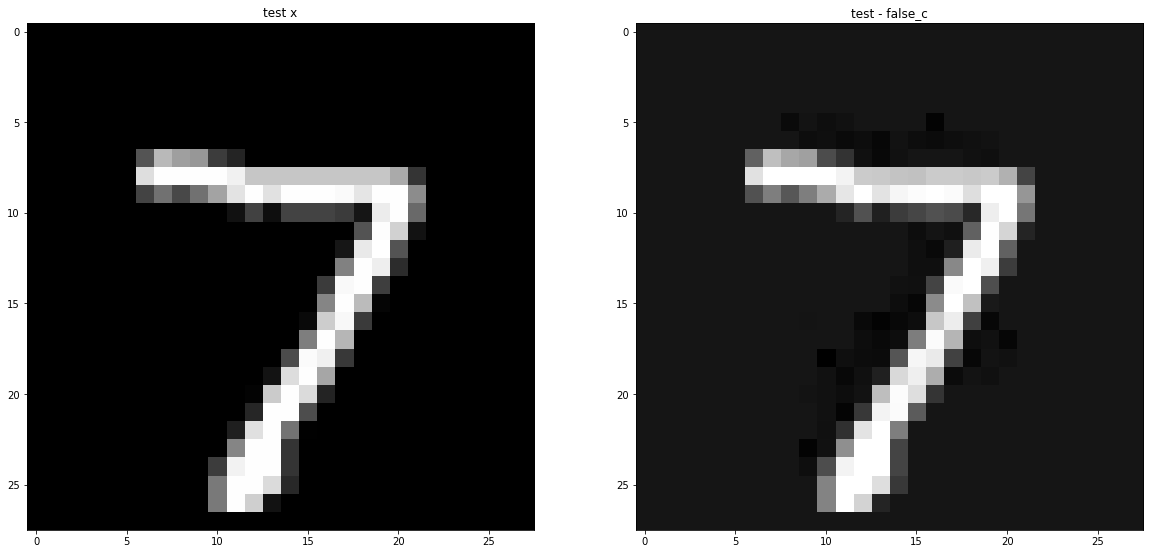

test x
7
0.9963132537478793
test - false_c
5
0.6429224887048725
#############################
8
入力値への勾配の合計


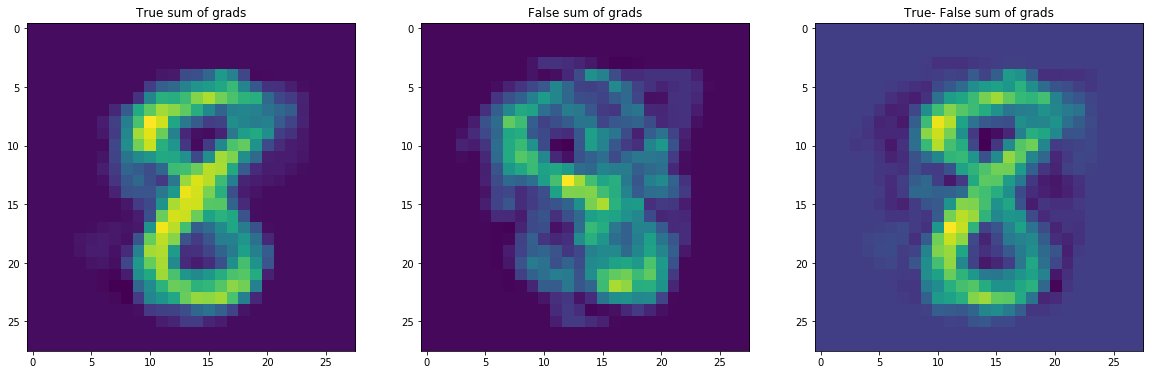

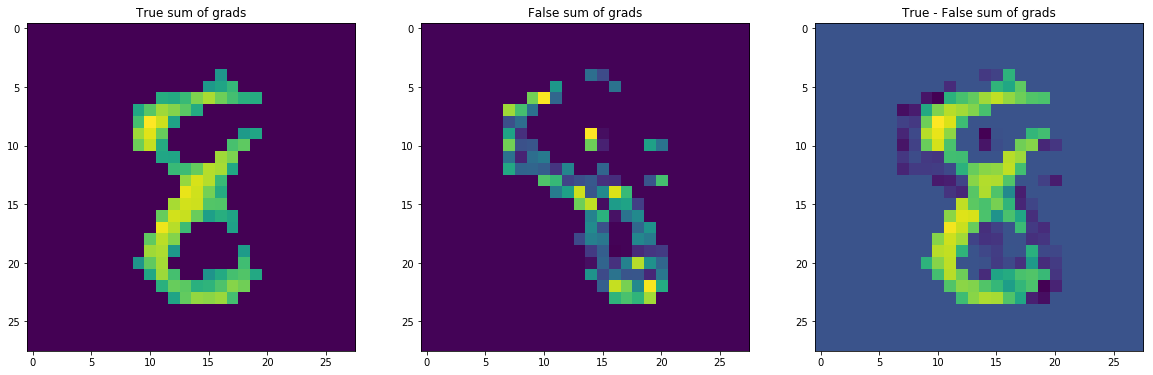

8
1.0
5
0.19045883305603503
8
1.0


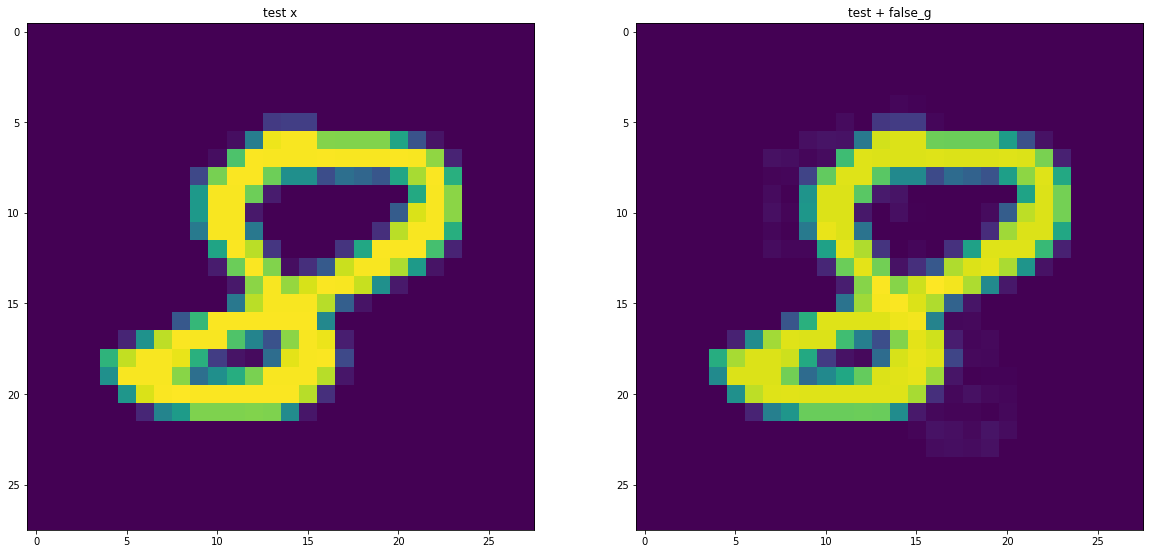

test x
8
0.9851680582636301
test + false_g
8
0.9868716502072715
--------------------------
関わった入力値への回数


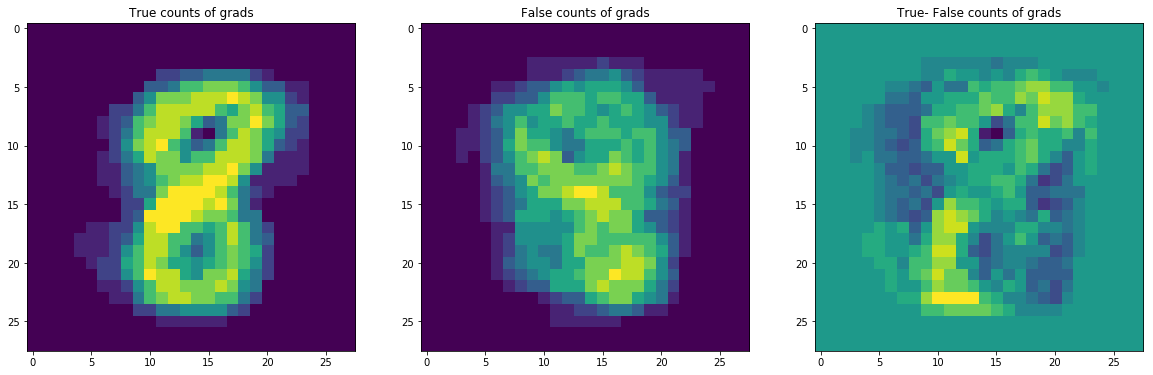

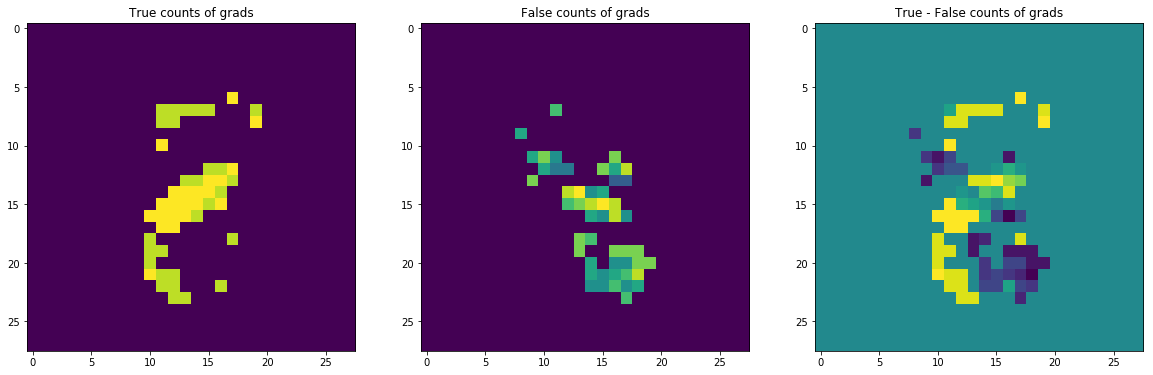

8
0.9999521444967779
4
0.4046160275903802
8
0.9965459409367589


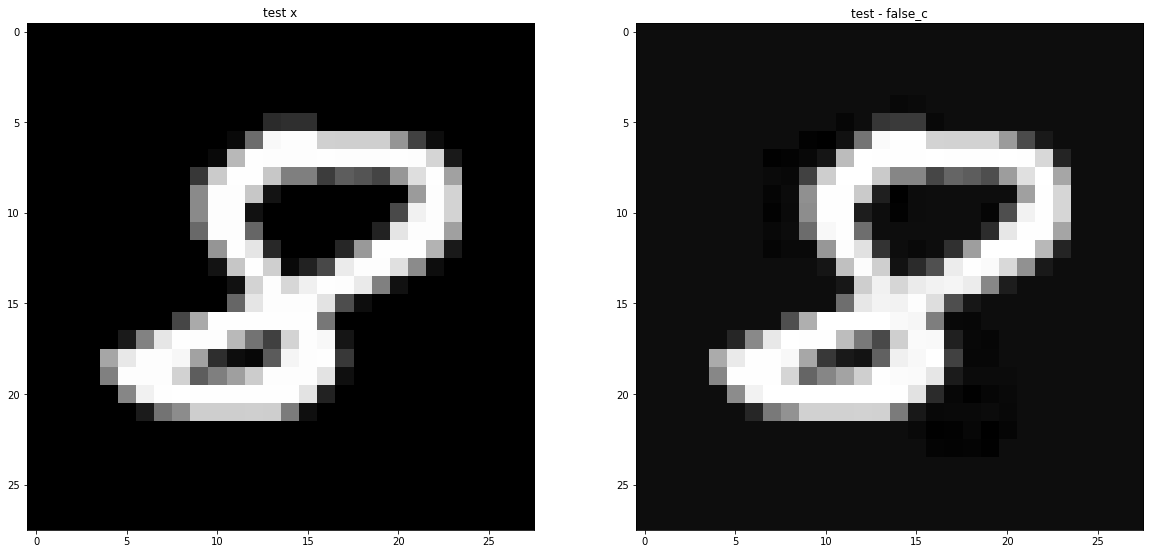

test x
8
0.9851680582636301
test - false_c
2
0.4031051938388707
#############################
9
入力値への勾配の合計


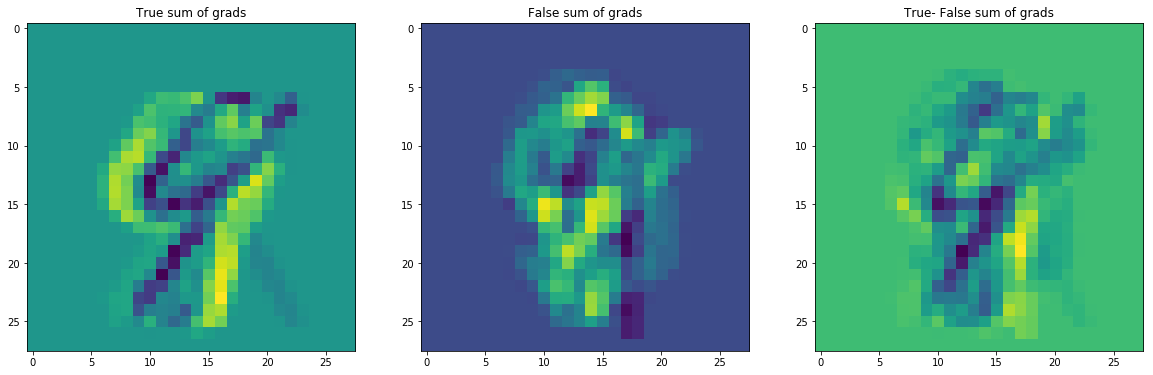

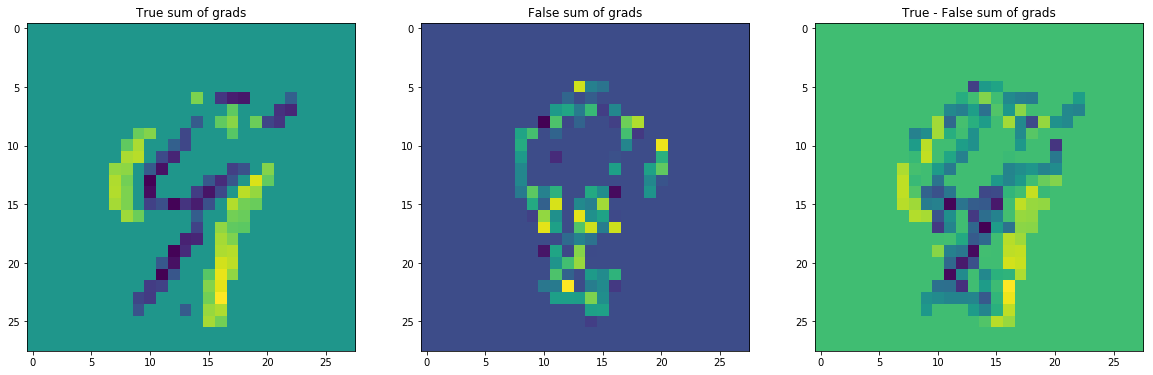

5
0.9599851742958483
5
0.2126791040057732
5
0.9616785635569408


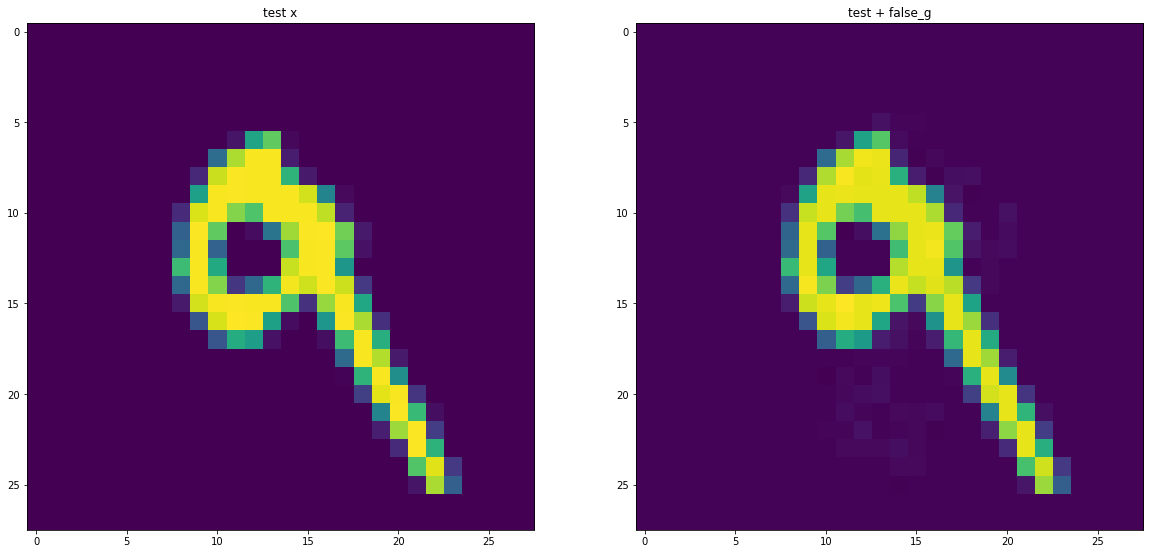

test x
9
0.9914236600584703
test + false_g
9
0.9912241440451575
--------------------------
関わった入力値への回数


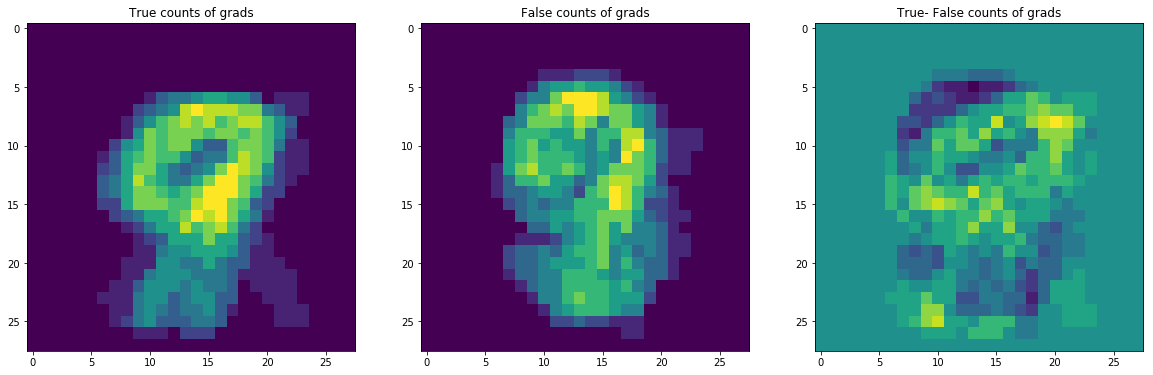

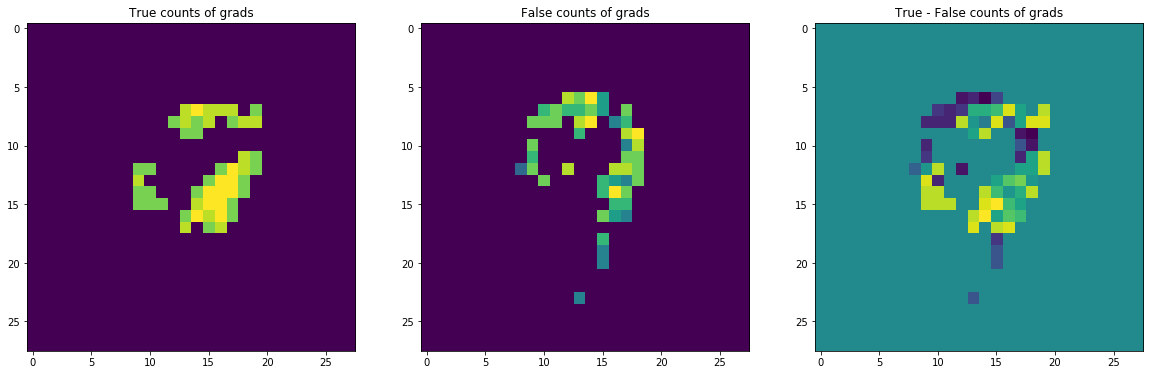

9
1.0
7
0.6533934669445222
9
1.0


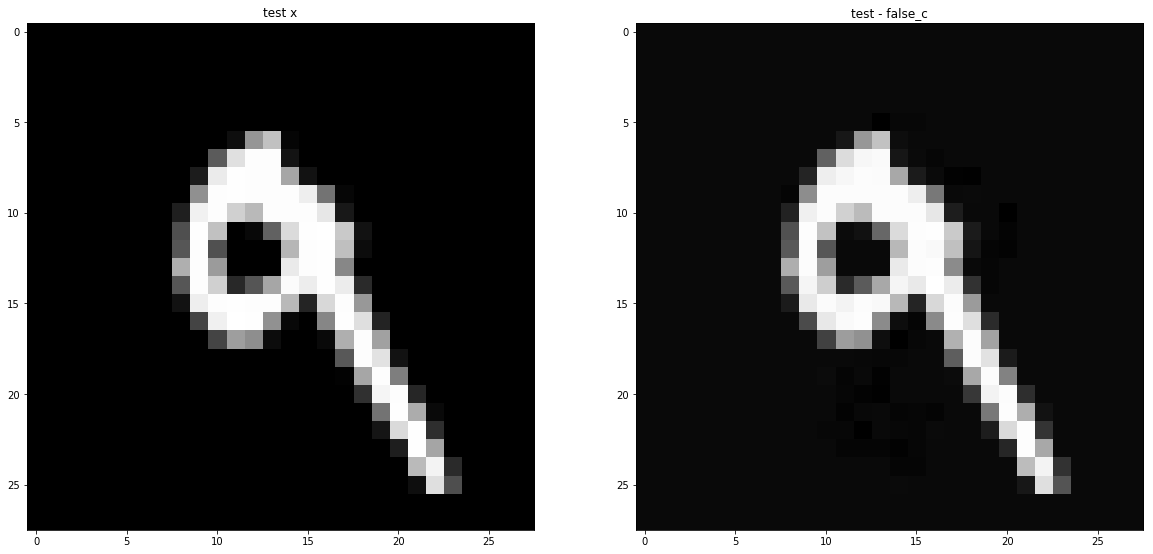

test x
9
0.9914236600584703
test - false_c
2
0.799267683668059
#############################


In [34]:
for i in range(10):
    print(i)
    true_nums = true_list[i][:10]
    false_nums = false_list[i][:10]
    
    print("入力値への勾配の合計")
    
    t_img_g, f_img_g = compare_g_x(true_nums, false_nums, i)
    
    pre_t_g = network.predict(t_img_g)
    print(np.argmax(pre_t_g))
    print(max(softmax(pre_t_g)))
    
    pre_f_g = network.predict(f_img_g)
    print(np.argmax(pre_f_g))
    print(max(softmax(pre_f_g)))
    
    pre_tf_g = network.predict(t_img_g - f_img_g)
    print(np.argmax(pre_tf_g))
    print(max(softmax(pre_tf_g)))
    
    fig1 = plt.figure(figsize=(20, 20))

    ax1 = fig1.add_subplot(1, 2, 1)
    ax2 = fig1.add_subplot(1, 2, 2)
    ax1.set_title("test x")
    ax1.imshow(x_test[true_nums[0]].reshape(28,28))
    ax2.set_title("test + false_g")
    ax2.imshow((x_test[true_nums[0]]+f_img_g).reshape(28,28))
    plt.show()
    
    print("test x")
    print(np.argmax(softmax(network.predict(x_test[true_nums[0]]))))
    print(max(softmax(network.predict(x_test[true_nums[0]]))))
    
    print("test + false_g")
    print(np.argmax(softmax(network.predict(x_test[true_nums[0]]+f_img_g))))
    print(max(softmax(network.predict(x_test[true_nums[0]]+f_img_g))))
    
    print("--------------------------")
    
    print("関わった入力値への回数")
    
    t_img_c, f_img_c = compare_c_x(true_nums, false_nums, i)
    
    f_img_c = (f_img_c != 0)
#     print(f_img_c)
#     print(x_test[true_nums[0]]-f_img_c)
    
    pre_t_c = network.predict(t_img_c)
    print(np.argmax(pre_t_c))
    print(max(softmax(pre_t_c)))
    
    pre_f_c = network.predict(f_img_c)
    print(np.argmax(pre_f_c))
    print(max(softmax(pre_f_c)))
    
    pre_tf_c = network.predict(t_img_c - f_img_c)
    print(np.argmax(pre_tf_c))
    print(max(softmax(pre_tf_c)))
    
    fig2 = plt.figure(figsize=(20, 20))

    ax1 = fig2.add_subplot(1, 2, 1)
    ax2 = fig2.add_subplot(1, 2, 2)
    ax1.set_title("test x")
    ax1.imshow(x_test[true_nums[0]].reshape(28,28), 'gray')
    ax2.set_title("test - false_c")
    ax2.imshow((x_test[true_nums[0]]-f_img_g).reshape(28,28), 'gray')
    plt.show()
    
    print("test x")
    print(np.argmax(softmax(network.predict(x_test[true_nums[0]]))))
    print(max(softmax(network.predict(x_test[true_nums[0]]))))
    
    print("test - false_c")
    print(np.argmax(softmax(network.predict(x_test[true_nums[0]]-f_img_c))))
    print(max(softmax(network.predict(x_test[true_nums[0]]-f_img_c))))
    
    print("#############################")